In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json

import sys

sys.path.append("../")

##################################################################
os.environ["TOKENIZERS_PARALLELISM"] = "false"
# os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3,4,5,6,7"
##################################################################

import logging
from src.utils import logging_utils
from src.utils import env_utils

logger = logging.getLogger(__name__)

logging.basicConfig(
    level=logging.DEBUG,
    format=logging_utils.DEFAULT_FORMAT,
    datefmt=logging_utils.DEFAULT_DATEFMT,
    stream=sys.stdout,
)

import torch
import transformers

logger.info(f"{torch.__version__=}, {torch.version.cuda=}")
logger.info(
    f"{torch.cuda.is_available()=}, {torch.cuda.device_count()=}, {torch.cuda.get_device_name()=}"
)
logger.info(f"{transformers.__version__=}")

2025-09-09 00:31:55 __main__ INFO     torch.__version__='2.7.0+cu126', torch.version.cuda='12.6'
2025-09-09 00:31:55 __main__ INFO     torch.cuda.is_available()=True, torch.cuda.device_count()=8, torch.cuda.get_device_name()='NVIDIA A100 80GB PCIe'
2025-09-09 00:31:55 __main__ INFO     transformers.__version__='4.55.3'


In [3]:
from src.utils.training_utils import get_device_map

# model_key = "meta-llama/Llama-3.2-3B"
# model_key = "meta-llama/Llama-3.1-8B"
# model_key = "meta-llama/Llama-3.1-70B-Instruct"
model_key = "meta-llama/Llama-3.3-70B-Instruct"
# model_key = "meta-llama/Llama-3.1-405B-Instruct"

# model_key = "google/gemma-2-9b-it"
# model_key = "google/gemma-3-12b-it"
# model_key = "google/gemma-2-27b-it"

# model_key = "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"

# model_key = "allenai/OLMo-2-1124-7B-Instruct"
# model_key = "allenai/OLMo-7B-0424-hf"

# model_key = "Qwen/Qwen2-7B"
# model_key = "Qwen/Qwen2.5-14B-Instruct"
# model_key = "Qwen/Qwen2.5-32B-Instruct"
# model_key = "Qwen/Qwen2.5-72B-Instruct"

# model_key = "Qwen/Qwen3-1.7B"
# model_key = "Qwen/Qwen3-4B"
# model_key = "Qwen/Qwen3-8B"
# model_key = "Qwen/Qwen3-14B"
# model_key = "Qwen/Qwen3-32B"

# device_map = get_device_map(model_key, 30, n_gpus=8)
# device_map

2025-09-09 00:31:58 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-09-09 00:31:58 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-09-09 00:31:58 wandb.docker.auth DEBUG    Trying paths: ['/disk/u/arnab/.docker/config.json', '/disk/u/arnab/.dockercfg']
2025-09-09 00:31:58 wandb.docker.auth DEBUG    No config file found


In [4]:
from src.models import ModelandTokenizer

# from transformers import BitsAndBytesConfig

mt = ModelandTokenizer(
    model_key=model_key,
    torch_dtype=torch.bfloat16,
    # device_map=device_map,
    device_map="auto",
    # quantization_config = BitsAndBytesConfig(
    #     # load_in_4bit=True
    #     load_in_8bit=True
    # )
    attn_implementation="eager",
)

2025-09-09 00:31:59 src.models WARNING  meta-llama/Llama-3.3-70B-Instruct not found in /disk/u/arnab/Codes/Models
If not found in cache, model will be downloaded from HuggingFace to cache directory
2025-09-09 00:31:59 urllib3.connectionpool DEBUG    Starting new HTTPS connection (1): huggingface.co:443


2025-09-09 00:31:59 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/config.json HTTP/1.1" 200 0
2025-09-09 00:31:59 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/tokenizer_config.json HTTP/1.1" 200 0
2025-09-09 00:32:00 urllib3.connectionpool DEBUG    https://huggingface.co:443 "GET /api/models/meta-llama/Llama-3.3-70B-Instruct/tree/main/additional_chat_templates?recursive=False&expand=False HTTP/1.1" 404 64


Loading checkpoint shards:   0%|          | 0/30 [00:00<?, ?it/s]

2025-09-09 00:32:48 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/generation_config.json HTTP/1.1" 200 0
2025-09-09 00:32:48 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/custom_generate/generate.py HTTP/1.1" 404 0
2025-09-09 00:32:48 src.models INFO     loaded model <meta-llama/Llama-3.3-70B-Instruct> | size: 134570.516 MB | dtype: torch.bfloat16 | device: cuda:0


In [5]:
mt

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 8192)
    (layers): ModuleList(
      (0-79): 80 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear(in_features=8192, out_features=8192, bias=False)
          (k_proj): Linear(in_features=8192, out_features=1024, bias=False)
          (v_proj): Linear(in_features=8192, out_features=1024, bias=False)
          (o_proj): Linear(in_features=8192, out_features=8192, bias=False)
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=8192, out_features=28672, bias=False)
          (up_proj): Linear(in_features=8192, out_features=28672, bias=False)
          (down_proj): Linear(in_features=28672, out_features=8192, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((8192,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((8192,), eps=1e-05)
      )
    )
    (norm): LlamaRMSNorm((8192,), eps=1e-05)
    (rotary_

In [6]:
# file_path = os.path.join(
#     env_utils.DEFAULT_DATA_DIR,
#     "selection",
#     # "profession.json"
#     # "nationality.json"
#     "objects.json",
# )

# with open(file_path, "r") as f:
#     temp = json.load(f)

# for cat in temp["categories"]:
#     temp["categories"][cat] = [obj.capitalize() for obj in temp["categories"][cat]]

# with open(file_path, "w") as f:
#     json.dump(temp, f, indent=4)


In [7]:
from src.selection.data import SelectOneTask, SelectOrderTask

#################################################################################
# TASK_CLS = SelectOrderTask
# prompt_template_idx = 1
TASK_CLS = SelectOneTask
prompt_template_idx = 3
N_DISTRACTORS = 5
OPTION_STYLE = "single_line"
#################################################################################

select_task = TASK_CLS.load(
    path=os.path.join(
        env_utils.DEFAULT_DATA_DIR, 
        "selection", 
        # "profession.json"
        # "nationality.json"
        "objects.json"
    )
)

print(select_task)

SelectOneTask: (different objects)
Categories: fruit(15), vehicle(15), furniture(15), animal(15), music instrument(15), clothing(15), electronics(15), sport equipment(15), kitchen appliance(15), vegetable(14), building(15), office supply(15), bathroom item(15), flower(15), tree(15), jewelry(15)



In [8]:
sample = select_task.get_random_sample(
    mt = mt,
    option_style=OPTION_STYLE,
    prompt_template_idx=prompt_template_idx,
    obj_idx=2,
    # category="actor",
    # category="Brazil"
    category="fruit",
    filter_by_lm_prediction=False,
)

print(sample)
print(sample.prompt())

Blueberry -> Peach (2): ['Library', 'Redwood', 'Peach', 'Bookshelf', 'Air fryer', 'Toothbrush']
Options: Library, Redwood, Peach, Bookshelf, Air fryer, Toothbrush.
Which among these objects mentioned above is a fruit?
Answer:


In [9]:
from src.selection.utils import verify_correct_option
# sample.prompt_template = select_prof.prompt_templates[3]
print(f'"{sample.prompt()}"', ">>", sample.obj)

verify_correct_option(
    mt=mt,
    target=sample.obj,
    options=sample.options,
    input=sample.prompt()
)

"Options: Library, Redwood, Peach, Bookshelf, Air fryer, Toothbrush.
Which among these objects mentioned above is a fruit?
Answer:" >> Peach


(True,
 [PredictedToken(token=' Peach', prob=0.88671875, logit=22.625, token_id=64695, metadata=None),
  PredictedToken(token=' The', prob=0.044189453125, logit=19.625, token_id=578, metadata=None),
  PredictedToken(token=' Among', prob=0.038818359375, logit=19.5, token_id=22395, metadata=None),
  PredictedToken(token=' A', prob=0.01116943359375, logit=18.25, token_id=362, metadata=None),
  PredictedToken(token=' PE', prob=0.00408935546875, logit=17.25, token_id=22557, metadata=None)],
 OrderedDict([(64695,
               (1,
                PredictedToken(token=' Peach', prob=0.88671875, logit=22.625, token_id=64695, metadata=None))),
              (3816,
               (28,
                PredictedToken(token=' Red', prob=0.0001316070556640625, logit=13.8125, token_id=3816, metadata=None))),
              (11896,
               (62,
                PredictedToken(token=' Library', prob=2.5987625122070312e-05, logit=12.1875, token_id=11896, metadata=None))),
              (83499,
   

In [10]:
from src.functional import generate_with_patch

gen = generate_with_patch(
    mt = mt,
    inputs = sample.prompt(),
    max_new_tokens=20,
    do_sample=False,
    remove_prefix=True
)[0]
print(f'"{gen}"', ">>", sample.obj)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


You have set `compile_config`, but we are unable to meet the criteria for compilation. Compilation will be skipped.


" Peach.
Explanation: Peach is a type of fruit. The other options are not fruits. Library," >> Peach


In [11]:
mt.n_layer, mt.config.num_attention_heads

(80, 64)

In [12]:
llama_70_heads = [
    (33, 45),
    (33, 18),
    (34, 1),
    (34, 6),
    (34, 7),
    (35, 19),
    (39, 40),
    (42, 30),
    (47, 18),
    (52, 58),
]

qwen_72_heads = [
    (62, 1),
    (60, 9),
    (64, 8),
    (62, 0),
    (62, 45),
    (59, 59),
    (71, 28),
    (64, 12),
    (61, 7),
    (64, 13),
    (67, 53),
    (67, 51),
    (54, 44),
    (57, 5),
    (59, 60),
    (71, 25),
    (62, 7),
    (64, 9),
    (62, 23),
    (65, 40),
]

qwen_32_heads = [
    (51, 11),
    (48, 4),
    (52, 21),
    (54, 35),
    (48, 8),
    (50, 6),
    (48, 9),
    (48, 32),
    (52, 10),
    (45, 11),
    (45, 13),
    (48, 34),
    (53, 16),
    (50, 12),
    (49, 2),
    (54, 38),
    (55, 4),
    (50, 27),
    (54, 33),
    (50, 14),
]


# HEADS = [(35, 19)]


# with open("optimized_heads.json", "r") as f:
#     HEADS = json.load(f)

# with open("category_wise_heads.json", "r") as f:
#     category_wise_heads = json.load(f)
# HEADS = [
#     (layer_idx, head_idx)
#     for layer_idx, head_idx, score in category_wise_heads["all"][:100]
# ]
# HEADS = [(layer_idx, head_idx) for layer_idx, head_idx in HEADS if layer_idx < 61]

# HEADS = qwen_32_heads
HEADS = llama_70_heads
print(len(HEADS))

10


2025-09-09 00:33:09 matplotlib DEBUG    matplotlib data path: /disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/matplotlib/mpl-data
2025-09-09 00:33:09 matplotlib DEBUG    CONFIGDIR=/disk/u/arnab/.config/matplotlib
2025-09-09 00:33:09 matplotlib DEBUG    interactive is False
2025-09-09 00:33:09 matplotlib DEBUG    platform is linux


2025-09-09 00:33:09 matplotlib DEBUG    CACHEDIR=/disk/u/arnab/.cache/matplotlib
2025-09-09 00:33:09 matplotlib.font_manager DEBUG    Using fontManager instance from /disk/u/arnab/.cache/matplotlib/fontlist-v390.json
2025-09-09 00:33:10 matplotlib.pyplot DEBUG    Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-09-09 00:33:10 matplotlib.pyplot DEBUG    Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-09-09 00:33:10 matplotlib.font_manager DEBUG    findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2025-09-09 00:33:10 matplotlib.font_manager DEBUG    findfont: score(FontEntry(fname='/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2025-09-09 00:33:10 matplotlib.font_manager DEBUG    findfont: score(FontEn

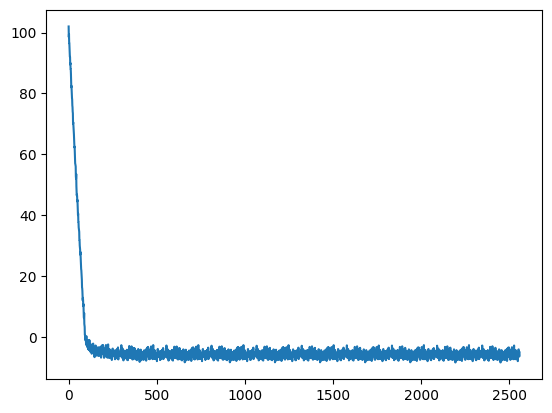

In [13]:
from matplotlib import pyplot as plt
import numpy as np

# optimized_path = os.path.join(
#     env_utils.DEFAULT_RESULTS_DIR,
#     "selection/optimized_backup_heads",
#     mt.name.split("/")[-1],
#     f"{select_task.task_name}.npz"
# )

optimized_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection/optimized_heads",
    # mt.name.split("/")[-1],
    model_key.split("/")[-1],
    "distinct_options",
    f"{select_task.task_name}",
    "epoch_10.npz"
)

optimization_results = np.load(optimized_path, allow_pickle=True)
plt.plot(optimization_results["losses"])
plt.show()

79


[False]

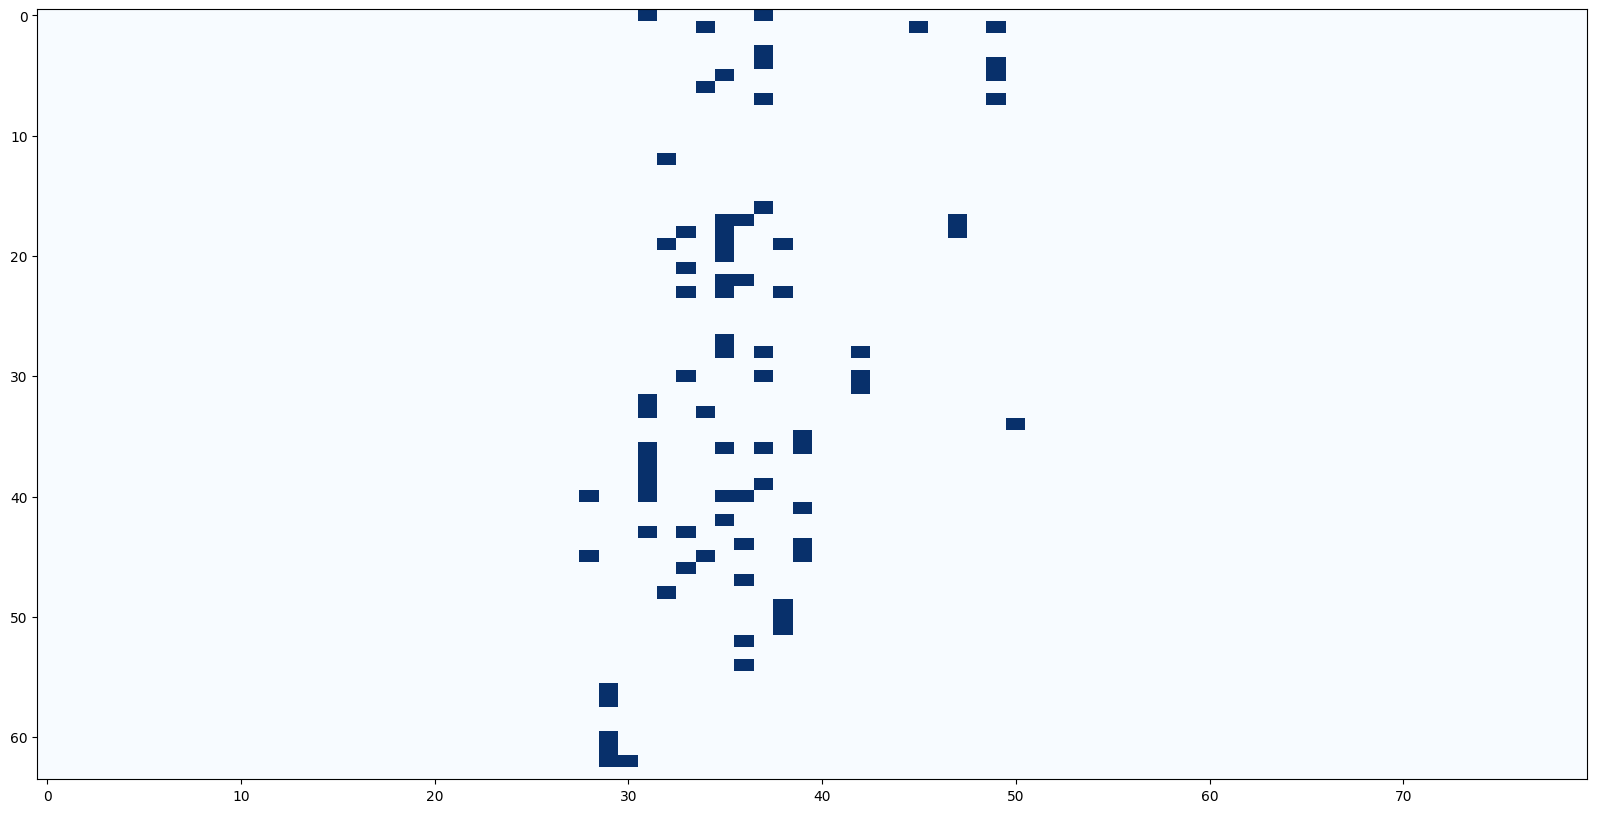

In [14]:
plt.figure(figsize=(20, 10))

optimal_head_mask = torch.tensor(optimization_results["optimal_mask"]).to(torch.float32)
optimal_head_mask[52:, :] = 0.0

plt.imshow(
    optimal_head_mask.T.numpy(),
    cmap="Blues",
    aspect="auto",
    vmin=0,
    vmax=1,
)

optimized_heads = torch.nonzero(optimal_head_mask > 0.5, as_tuple=False).tolist()
optimized_heads = [
    (layer_idx, head_idx) for layer_idx, head_idx in optimized_heads
]
print(len(optimized_heads))

HEADS = optimized_heads

# (35, 19) in HEADS, (35, 19) in heads_selected
[(29, 3) in HEADS]

In [15]:
# from src.tokens import find_token_range, prepare_input

# string = sample.prompt()
# substring = sample.obj

# tokenized_prompt = prepare_input(
#     prompts=string, 
#     tokenizer=mt.tokenizer, 
#     return_offsets_mapping=True,
#     add_bos_token="qwen" in mt.name.lower()
# )
# string = mt.tokenizer.decode(tokenized_prompt.input_ids[0], skip_special_tokens=False)
# offset_mapping = tokenized_prompt.pop("offset_mapping")[0]

# ans_range = find_token_range(
#     string=string,
#     substring=substring,
#     offset_mapping=offset_mapping
# )
# print(f"Answer range: {ans_range}")
# print(f'"{mt.tokenizer.decode(tokenized_prompt.input_ids[0][range(*ans_range)])}"')
# # for idx, (tok, offset_range) in enumerate(zip(tokenized_prompt.input_ids[0], offset_mapping)):
# #     print(f"Token {idx}: \"{mt.tokenizer.decode([tok])}\" -- {offset_range}")

In [16]:
from src.attention import get_attention_matrices
from src.selection.functional import (
    verify_head_patterns,
    get_patches_to_verify_independent_enrichment,
)

attn_pattern = verify_head_patterns(
    prompt=sample.prompt(option_style="single_line"),
    options=sample.options,
    pivot=sample.subj,
    mt=mt,
    heads=optimized_heads,
    # heads = HEADS,
    # heads = [(29, 3)],
    start_from=1
)

2025-09-09 00:33:13 src.selection.functional DEBUG    Predictions: ['" Peach"[64695] (p=0.887, logit=22.625)', '" The"[578] (p=0.044, logit=19.625)', '" Among"[22395] (p=0.039, logit=19.500)', '" A"[362] (p=0.011, logit=18.250)', '" PE"[22557] (p=0.004, logit=17.250)']
2025-09-09 00:33:13 src.selection.functional INFO     Combined attention matrix for all heads


In [17]:
import copy
import random
from src.selection.utils import KeyedSet, get_first_token_id, verify_correct_option
from src.selection.data import SelectionSample
from src.functional import predict_next_token
from src.tokens import prepare_input

######################################################################
N_DISTRACTORS = 5
######################################################################

from src.selection.data import get_counterfactual_samples_within_task

In [18]:
patch_prompt_template_idx = 3
clean_prompt_template_idx = 3

patch_sample, clean_sample = get_counterfactual_samples_within_task(
    # patch_category="politician",
    # clean_category="actor",
    mt=mt,
    task=select_task,
    patch_category="fruit",
    clean_category="vehicle",
    prompt_template_idx=prompt_template_idx,
    filter_by_lm_prediction=True,
    distinct_options=True,
    patch_n_distractors=5,
    clean_n_distractors=5,
    patch_prompt_template_idx=patch_prompt_template_idx,
    clean_prompt_template_idx=clean_prompt_template_idx,
    # patch_option_style="single_line",
    # clean_option_style="numbered",
)

clean_sample.metadata

2025-09-09 00:33:14 src.selection.data INFO     clean_obj_idx=0 | ['Boat', 'Tiger', 'Cabinet', 'Peach', 'Coffee maker', 'Pen']


type(task)=<class 'src.selection.data.SelectOneTask'>
2025-09-09 00:33:14 src.selection.data INFO     Options: Bathtub, Tie, Blueberry, Redwood, Ambulance, Cello.
Which among these objects mentioned above is a fruit?
Answer:
2025-09-09 00:33:14 src.selection.data INFO     Raspberry | fruit -> Blueberry | pred=['" Blue"[8868] (p=0.801, logit=22.000)', '" The"[578] (p=0.084, logit=19.750)', '" Among"[22395] (p=0.045, logit=19.125)', '" A"[362] (p=0.035, logit=18.875)', '" Fruit"[44187] (p=0.004, logit=16.625)']
2025-09-09 00:33:15 src.selection.data INFO     Options: Boat, Tiger, Cabinet, Peach, Coffee maker, Pen.
Which among these objects mentioned above is a vehicle?
Answer:
2025-09-09 00:33:15 src.selection.data INFO     Airplane | vehicle -> Boat | pred=['" Boat"[45332] (p=0.805, logit=22.000)', '" The"[578] (p=0.058, logit=19.375)', '" A"[362] (p=0.052, logit=19.250)', '" Among"[22395] (p=0.027, logit=18.625)', '" None"[2290] (p=0.017, logit=18.125)']
2025-09-09 00:33:15 src.selecti

{'track_category': 'fruit',
 'track_type_obj': 'Peach',
 'track_type_obj_idx': 3,
 'track_type_obj_token_id': 64695,
 'ques_pos': 25,
 'tokenized': {'input_ids': tensor([[128000,   3883,     25,  45332,     11,  36845,     11,  34046,     11,
            64695,     11,  27171,  25214,     11,  13597,    627,  23956,   4315,
             1521,   6302,   9932,   3485,    374,    264,   7458,   5380,  16533,
               25]], device='cuda:0'),
  'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
           1, 1, 1, 1]], device='cuda:0')}}

In [19]:
# order_sample_1 = SelectionSample(
#     subj="random",
#     category="test_order",
#     options=["Bike", "Apple", "Bed", "Dog", "Monitor", "Theater"],
#     obj="Apple",
#     obj_idx=1,
#     prompt_template="<_options_>\nWhat is the third item in the list?\nAnswer:",
#     answer="Apple",
# )

# order_sample_2 = SelectionSample(
#     subj="random",
#     category="test_order",
#     options=["Cat", "Chair", "Bus", "Phone", "Library", "Orange"],
#     obj="Phone",
#     obj_idx=3,
#     prompt_template="<_options_>\nWhat is the fifth item in the list?\nAnswer:",
#     answer="Phone",
# )
len(HEADS)

79

In [20]:
from src.functional import generate_with_patch
from src.selection.functional import verify_head_patterns

# patch_sample.options[patch_sample.obj_idx] = "Screw"
# patch_sample.options[patch_sample.obj_idx] = patch_sample.obj

gold_sample = copy.deepcopy(patch_sample)
gold_sample.options = clean_sample.options

for sample in [patch_sample, clean_sample, gold_sample]:
# for sample in [order_sample_1, order_sample_2]:
    print(sample.prompt(), ">>", sample.obj)
    attn_pattern = verify_head_patterns(
        prompt=sample.prompt(),
        options=sample.options,
        pivot=sample.subj,
        mt=mt,
        # heads=qwen_72_heads,
        heads=optimized_heads,
        # heads=[(layer_idx, head_idx)],
        # generate_full_answer=True,
        query_index=-1
    )

Options: Bathtub, Tie, Blueberry, Redwood, Ambulance, Cello.
Which among these objects mentioned above is a fruit?
Answer: >> Blueberry
2025-09-09 00:33:16 src.selection.functional DEBUG    Predictions: ['" Blue"[8868] (p=0.801, logit=22.000)', '" The"[578] (p=0.084, logit=19.750)', '" Among"[22395] (p=0.045, logit=19.125)', '" A"[362] (p=0.035, logit=18.875)', '" Fruit"[44187] (p=0.004, logit=16.625)']
2025-09-09 00:33:16 src.selection.functional INFO     Combined attention matrix for all heads


Options: Boat, Tiger, Cabinet, Peach, Coffee maker, Pen.
Which among these objects mentioned above is a vehicle?
Answer: >> Boat
2025-09-09 00:33:16 src.selection.functional DEBUG    Predictions: ['" Boat"[45332] (p=0.805, logit=22.000)', '" The"[578] (p=0.058, logit=19.375)', '" A"[362] (p=0.052, logit=19.250)', '" Among"[22395] (p=0.027, logit=18.625)', '" None"[2290] (p=0.017, logit=18.125)']
2025-09-09 00:33:16 src.selection.functional INFO     Combined attention matrix for all heads


Options: Boat, Tiger, Cabinet, Peach, Coffee maker, Pen.
Which among these objects mentioned above is a fruit?
Answer: >> Blueberry
2025-09-09 00:33:17 src.selection.functional DEBUG    Predictions: ['" Peach"[64695] (p=0.770, logit=21.750)', '" The"[578] (p=0.092, logit=19.625)', '" Among"[22395] (p=0.063, logit=19.250)', '" A"[362] (p=0.043, logit=18.875)', '" PE"[22557] (p=0.004, logit=16.500)']
2025-09-09 00:33:17 src.selection.functional INFO     Combined attention matrix for all heads


In [21]:
clean_sample.metadata, patch_sample.metadata

({'track_category': 'fruit',
  'track_type_obj': 'Peach',
  'track_type_obj_idx': 3,
  'track_type_obj_token_id': 64695,
  'ques_pos': 25,
  'tokenized': {'input_ids': tensor([[128000,   3883,     25,  45332,     11,  36845,     11,  34046,     11,
             64695,     11,  27171,  25214,     11,  13597,    627,  23956,   4315,
              1521,   6302,   9932,   3485,    374,    264,   7458,   5380,  16533,
                25]], device='cuda:0'),
   'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1]], device='cuda:0')}},
 {'track_category': 'vehicle',
  'track_type_obj': 'Ambulance',
  'track_type_obj_idx': 4,
  'track_type_obj_token_id': 20423,
  'ques_pos': 29,
  'tokenized': {'input_ids': tensor([[128000,   3883,     25,  16488,  66513,     11,  59825,     11,   8868,
             15717,     11,   3816,   6798,     11,  20423,  41932,     11,    356,
              4896,    627,  23956,   4315,   1521,   63

In [22]:
from src.selection.functional import cache_q_projections
from src.functional import interpret_logits
from src.tokens import prepare_input, find_token_range

prompts = [
    patch_sample.prompt(),
    clean_sample.prompt(),
]

tokenized = prepare_input(
    prompts=prompts,
    tokenizer=mt.tokenizer,
    return_offsets_mapping=True,
)

offset_mapping = tokenized.pop("offset_mapping")

question_ranges = [
    find_token_range(
        string=prompt,
        substring="?",
        occurrence=-1,
        offset_mapping=offset,
    )
    for prompt, offset in zip(prompts, offset_mapping)
]
ques_pos = [rng[1]-1 for rng in question_ranges]
for tok, q_pos in zip(tokenized.input_ids, ques_pos):
    assert mt.tokenizer.decode(tok[q_pos]).strip() == "?"

q_projections, out = cache_q_projections(
    mt=mt,
    input=tokenized,
    heads=HEADS,
    token_indices=[ [q_pos, -2, -1] for q_pos in ques_pos],
    return_output=True
)

In [23]:
tokenized

{'input_ids': tensor([[128000,   3883,     25,  16488,  66513,     11,  59825,     11,   8868,
          15717,     11,   3816,   6798,     11,  20423,  41932,     11,    356,
           4896,    627,  23956,   4315,   1521,   6302,   9932,   3485,    374,
            264,  14098,   5380,  16533,     25],
        [128009, 128009, 128009, 128009, 128000,   3883,     25,  45332,     11,
          36845,     11,  34046,     11,  64695,     11,  27171,  25214,     11,
          13597,    627,  23956,   4315,   1521,   6302,   9932,   3485,    374,
            264,   7458,   5380,  16533,     25]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]])}

In [24]:
patch_logits = out.logits[0, -1, :]
interpret_logits(
    logits=patch_logits,
    tokenizer=mt.tokenizer,
)

[PredictedToken(token=' Blue', prob=0.79296875, logit=22.0, token_id=8868, metadata=None),
 PredictedToken(token=' The', prob=0.0947265625, logit=19.875, token_id=578, metadata=None),
 PredictedToken(token=' Among', prob=0.044677734375, logit=19.125, token_id=22395, metadata=None),
 PredictedToken(token=' A', prob=0.03466796875, logit=18.875, token_id=362, metadata=None),
 PredictedToken(token=' Fruit', prob=0.004150390625, logit=16.75, token_id=44187, metadata=None)]

In [25]:
patch_logits = out.logits[1, -1, :]
interpret_logits(
    logits=patch_logits,
    tokenizer=mt.tokenizer,
)

[PredictedToken(token=' Boat', prob=0.8046875, logit=22.0, token_id=45332, metadata=None),
 PredictedToken(token=' The', prob=0.058349609375, logit=19.375, token_id=578, metadata=None),
 PredictedToken(token=' A', prob=0.051513671875, logit=19.25, token_id=362, metadata=None),
 PredictedToken(token=' Among', prob=0.027587890625, logit=18.625, token_id=22395, metadata=None),
 PredictedToken(token=' None', prob=0.0147705078125, logit=18.0, token_id=2290, metadata=None)]

In [26]:
q_projections[1].keys()

dict_keys([(28, 40, 29), (28, 40, -2), (28, 40, -1), (28, 45, 29), (28, 45, -2), (28, 45, -1), (29, 56, 29), (29, 56, -2), (29, 56, -1), (29, 57, 29), (29, 57, -2), (29, 57, -1), (29, 60, 29), (29, 60, -2), (29, 60, -1), (29, 61, 29), (29, 61, -2), (29, 61, -1), (29, 62, 29), (29, 62, -2), (29, 62, -1), (30, 62, 29), (30, 62, -2), (30, 62, -1), (31, 0, 29), (31, 0, -2), (31, 0, -1), (31, 32, 29), (31, 32, -2), (31, 32, -1), (31, 33, 29), (31, 33, -2), (31, 33, -1), (31, 36, 29), (31, 36, -2), (31, 36, -1), (31, 37, 29), (31, 37, -2), (31, 37, -1), (31, 38, 29), (31, 38, -2), (31, 38, -1), (31, 39, 29), (31, 39, -2), (31, 39, -1), (31, 40, 29), (31, 40, -2), (31, 40, -1), (31, 43, 29), (31, 43, -2), (31, 43, -1), (32, 12, 29), (32, 12, -2), (32, 12, -1), (32, 19, 29), (32, 19, -2), (32, 19, -1), (32, 48, 29), (32, 48, -2), (32, 48, -1), (33, 18, 29), (33, 18, -2), (33, 18, -1), (33, 21, 29), (33, 21, -2), (33, 21, -1), (33, 23, 29), (33, 23, -2), (33, 23, -1), (33, 30, 29), (33, 30, -2)

## Testing patching the query projection of a single head

In [27]:
# from src.selection.functional import cache_q_projections
from src.functional import patch_with_baukit, PatchSpec, repeat_kv, get_module_nnsight
from src.utils.typing import TokenizerOutput, Tokenizer
from src.selection.functional import cache_q_projections, verify_head_patterns

def find_quesmark_pos(
    prompt: str, 
    tokenizer: Tokenizer,
    tokenized: TokenizerOutput,
    offset_mapping: list[tuple[int, int]] | None = None,
    ques_mark: str = "?",
):
    if offset_mapping is None:
        if tokenized is None or "offset_mapping" not in tokenized:
            tokenized = prepare_input(
                prompts=[prompt], 
                tokenizer=tokenizer, 
                return_offsets_mapping=True,
            )
        offset_mapping = tokenized.pop("offset_mapping")[0]
    
    ques_range = find_token_range(
        string=prompt,
        substring=ques_mark,
        occurrence=-1,
        offset_mapping=offset_mapping
    )
    ques_pos = ques_range[1]-1
    assert tokenizer.decode(tokenized.input_ids[0][ques_pos]).strip() == ques_mark
    return ques_pos

mt.set_attn_implementation("eager")
mt.reset_forward()

# test_heads = [(35, 19)]
test_heads = copy.deepcopy(optimized_heads)

patch_tokenized = prepare_input(
    prompts=patch_sample.prompt(), 
    tokenizer=mt,
    return_offsets_mapping=True
)
patch_offsets = patch_tokenized.pop("offset_mapping")[0]
patch_ques_pos = find_quesmark_pos(
    prompt=patch_sample.prompt(),
    tokenizer=mt.tokenizer,
    tokenized=patch_tokenized,
    offset_mapping=patch_offsets
)

clean_tokenized = prepare_input(
    prompts=clean_sample.prompt(), 
    tokenizer=mt,
    return_offsets_mapping=True
)
clean_offsets = clean_tokenized.pop("offset_mapping")[0]
clean_ques_pos = find_quesmark_pos(
    prompt=clean_sample.prompt(),
    tokenizer=mt.tokenizer,
    tokenized=clean_tokenized,
    offset_mapping=clean_offsets
)

indices = [patch_ques_pos, -2, -1]

q_states = cache_q_projections(
    mt=mt,
    input=patch_tokenized,
    heads=test_heads,
    token_indices=[indices],
)[0]

map_indices = {patch_ques_pos: clean_ques_pos, -2: -2, -1: -1}
q_patches = []
for (l_idx, h_idx, patch_token_idx), q_proj in q_states.items():
    q_patches.append(PatchSpec(
        location=(
            mt.attn_module_name_format.format(l_idx)+".q_proj",
            h_idx,
            map_indices[patch_token_idx]
        ),
        patch=q_proj.squeeze()
    ))

# The attention patterns for the patch sample should match exactly
test_inplace_swap = verify_head_patterns(
    prompt=patch_sample.prompt(),
    mt=mt,
    heads=test_heads,
    # heads=qwen_72_heads,
    tokenized_prompt=patch_tokenized,
    query_patches=q_patches
)

test_predicate_swap = verify_head_patterns(
    prompt=clean_sample.prompt(),
    mt=mt,
    heads=test_heads,
    # heads=qwen_72_heads,
    tokenized_prompt=clean_tokenized,
    query_patches=q_patches
)

2025-09-09 00:33:24 src.selection.functional DEBUG    Predictions: ['" Blue"[8868] (p=0.789, logit=22.000)', '" The"[578] (p=0.094, logit=19.875)', '" Among"[22395] (p=0.045, logit=19.125)', '" A"[362] (p=0.035, logit=18.875)', '" Fruit"[44187] (p=0.004, logit=16.625)']
2025-09-09 00:33:24 src.selection.functional INFO     Combined attention matrix for all heads


2025-09-09 00:33:25 src.selection.functional DEBUG    Predictions: ['" Peach"[64695] (p=0.832, logit=21.375)', '" Among"[22395] (p=0.042, logit=18.375)', '" None"[2290] (p=0.029, logit=18.000)', '" The"[578] (p=0.025, logit=17.875)', '" A"[362] (p=0.025, logit=17.875)']
2025-09-09 00:33:25 src.selection.functional INFO     Combined attention matrix for all heads


In [28]:
(
    (patch_ques_pos, mt.tokenizer.decode(patch_tokenized.input_ids[0][patch_ques_pos])),
    (clean_ques_pos, mt.tokenizer.decode(clean_tokenized.input_ids[0][clean_ques_pos]))
)

((29, '?\n'), (25, '?\n'))

In [38]:
import baukit
from src.functional import get_module_nnsight, PatchSpec
from src.hooking.llama_attention import LlamaAttentionPatcher
import types
from typing import Literal
from src.tokens import prepare_input


def set_attn_implementation(mt, attn_implementation: Literal["sdpa", "eager"]):
    mt.config._attn_implementation = attn_implementation
    for layer_idx in range(mt.config.num_hidden_layers):
        attn_block_name = mt.attn_module_name_format.format(layer_idx)
        attn_block = baukit.get_module(mt._model, attn_block_name)
        attn_block.config._attn_implementation = attn_implementation


###################################################################################
batch_size = 1  # tokenized.input_ids.shape[0]
n_heads = mt.config.num_attention_heads
head_dim = mt.n_embd // n_heads
query_idx = -1 # almost always the last token
###################################################################################

mt.reset_forward()
set_attn_implementation(mt, "sdpa")

layer_idx, head_idx = HEADS[0]

attn_block_name = mt.attn_module_name_format.format(layer_idx)
attn_block = baukit.get_module(mt._model, attn_block_name)
attn_block.forward = types.MethodType(
    LlamaAttentionPatcher(block_name=attn_block_name),
    attn_block,
)

patch_tokenized = prepare_input(prompts=patch_sample.prompt(), tokenizer=mt)
patch_seq_len = patch_tokenized.input_ids.shape[1]
input_ln = mt.layer_name_format.format(layer_idx) + ".input_layernorm"

with mt.trace(patch_tokenized) as trace:
    ln_module = get_module_nnsight(mt, input_ln)
    patch_ln = ln_module.output.save()

    q_proj_name = mt.attn_module_name_format.format(layer_idx) + ".q_proj"
    q_proj_module = get_module_nnsight(mt, q_proj_name)
    patch_q_proj = q_proj_module.output.view(batch_size, patch_seq_len, n_heads, head_dim).transpose(1, 2).save()
    # patch_q_proj = PatchSpec(
    #     location=(q_proj_name + f".{head_idx}", -1),
    #     patch=patch_q_proj[:, head_idx, query_idx, :].squeeze().save()
    # )

clean_tokenized = prepare_input(prompts=clean_sample.prompt(), tokenizer=mt)
clean_seq_len = clean_tokenized.input_ids.shape[1]
with mt.trace(clean_tokenized) as trace:
    ln_module = get_module_nnsight(mt, input_ln)
    clean_ln = ln_module.output.save()

    q_proj_name = mt.attn_module_name_format.format(layer_idx) + ".q_proj"
    q_proj_module = get_module_nnsight(mt, q_proj_name)
    clean_q_proj = q_proj_module.output.view(batch_size, clean_seq_len, n_heads, head_dim).transpose(1, 2).save()
    # clean_q_proj = PatchSpec(
    #     location=(q_proj_name + f".{head_idx}", -1),
    #     patch=clean_q_proj[:, head_idx, query_idx, :].squeeze().save()
    # )

mt.reset_forward()
set_attn_implementation(mt, "eager")

patch_q_proj.shape, clean_q_proj.shape, patch_ln.shape, clean_ln.shape

NNsightException: 

Traceback (most recent call last):
  File "/tmp/ipykernel_892520/3560673123.py", line 84, in <module>
    patch_q_proj = q_proj_module.output.view(batch_size, patch_seq_len, n_heads, head_dim).transpose(1, 2).save()

RuntimeError: shape '[1, 30, 32, 144]' is invalid for input of size 122880

In [ ]:
from src.attention import visualize_attn_matrix
from src.functional import get_hs, interpret_logits

mt.reset_forward()
set_attn_implementation(mt, "sdpa")

layer_idx, head_idx = 35, 19
# layer_idx, head_idx = 62, 1

attn_matrices = {layer_idx: {}}

attn_block_name = mt.attn_module_name_format.format(layer_idx)
attn_block = baukit.get_module(mt._model, attn_block_name)
attn_block.forward = types.MethodType(
    LlamaAttentionPatcher(
        block_name=attn_block_name,
        save_attn_for=[head_idx],
        store_attn_matrices=attn_matrices[layer_idx],
    ),
    attn_block,
)

logit_location = (mt.lm_head_name, -1)
logits = get_hs(
    mt = mt,
    input = clean_tokenized,
    locations = [logit_location],
    return_dict=False
).squeeze()  # (seq_len, vocab_size)

mt.reset_forward()
set_attn_implementation(mt, "eager")

head_matrix = attn_matrices[layer_idx][head_idx].squeeze().to(torch.float32).cpu().numpy()

visualize_attn_matrix(
    attn_matrix=head_matrix,
    tokens=[mt.tokenizer.decode(t) for t in clean_tokenized.input_ids[0]],
    q_index=-1,
)

interpret_logits(
    tokenizer=mt,
    logits=logits,
    interested_tokens=[clean_sample.metadata["track_type_obj_token_id"]],
)

In [ ]:
# type(mt._model), query_idx
head_idx, query_idx, patch_q_proj[:, head_idx, query_idx, :].shape

In [ ]:
from src.attention import visualize_attn_matrix

mt.reset_forward()
set_attn_implementation(mt, "sdpa")

attn_matrices = {layer_idx: {}}

attn_block_name = mt.attn_module_name_format.format(layer_idx)
attn_block = baukit.get_module(mt._model, attn_block_name)
attn_block.forward = types.MethodType(
    LlamaAttentionPatcher(
        block_name=attn_block_name,
        save_attn_for=[head_idx],
        store_attn_matrices=attn_matrices[layer_idx],
        query_patches=[(head_idx, query_idx, patch_q_proj[:, head_idx, query_idx, :].squeeze())],
    ),
    attn_block,
)

logit_location = (mt.lm_head_name, -1)
patch_logits = get_hs(
    mt = mt,
    # input = clean_tokenized,
    input=patch_tokenized,
    locations = [logit_location],
    return_dict=False
).squeeze()  # (seq_len, vocab_size)

mt.reset_forward()
set_attn_implementation(mt, "eager")

head_matrix = attn_matrices[layer_idx][head_idx].squeeze().to(torch.float32).cpu().numpy()

visualize_attn_matrix(
    attn_matrix=head_matrix,
    # tokens=[mt.tokenizer.decode(t) for t in clean_tokenized.input_ids[0]],
    tokens=[mt.tokenizer.decode(t) for t in patch_tokenized.input_ids[0]],
    q_index=-1,
)

interpret_logits(
    tokenizer=mt,
    logits=patch_logits,
    interested_tokens=[clean_sample.metadata["track_type_obj_token_id"]],
)

In [ ]:
torch.allclose(patch_logits, logits, atol = 1e-3)

In [ ]:
torch.allclose(
    patch_q_proj[:, head_idx, query_idx, :], 
    clean_q_proj[:, head_idx, query_idx, :],
    atol=1e-3
)

In [ ]:
# torch.allclose(
#     patch_ln[:, query_idx, :], 
#     clean_ln[:, query_idx, :],
#     atol=1e-3
# )

In [ ]:
# patch_ln[:, query_idx, :], clean_ln[:, query_idx, :]

In [ ]:
# # manual calculation
# attn_module = baukit.get_module(mt._model, mt.attn_module_name_format.format(layer_idx))
# patch_q_proj_manual = attn_module.q_proj(patch_ln)
# clean_q_proj_manual = attn_module.q_proj(clean_ln)

# print(patch_q_proj_manual.shape, clean_q_proj_manual.shape)
# print(torch.allclose(
#     patch_q_proj_manual[:, query_idx, :], 
#     clean_q_proj_manual[:, query_idx, :],
#     atol=1e-3
# ))

# patch_q_proj_manual = patch_q_proj_manual.reshape(batch_size, patch_seq_len, n_heads, head_dim).transpose(1, 2)
# clean_q_proj_manual = clean_q_proj_manual.reshape(batch_size, clean_seq_len, n_heads, head_dim).transpose(1, 2)
# print(patch_q_proj_manual.shape, clean_q_proj_manual.shape)

# for idx in range(n_heads):
#     print(head_idx, torch.allclose(
#         patch_q_proj_manual[:, idx, query_idx, :], 
#         clean_q_proj_manual[:, idx, query_idx, :],
#         atol=1e-3
#     ))

In [ ]:
# torch.allclose(
#     patch_q_proj_manual[:, head_idx, query_idx, :], 
#     patch_q_proj[:, head_idx, query_idx, :],
#     atol=1e-3
# )

In [ ]:
replace_q_proj = clean_q_proj.clone()
replace_q_proj[:, head_idx, query_idx, :] = patch_q_proj[:, head_idx, query_idx, :]

print(torch.allclose(
        replace_q_proj[:, head_idx, query_idx, :],
        clean_q_proj[:, head_idx, query_idx, :],
        atol=1e-3
    )
)
print(replace_q_proj.shape)

replace_q_proj = replace_q_proj.transpose(1, 2).reshape(batch_size, clean_seq_len, -1)

rep_patch = PatchSpec(
    location=(q_proj_name, -1),
    patch=replace_q_proj[:, -1, :].squeeze(),
)

ln_patch = PatchSpec(
    location=(input_ln, -1),
    patch=patch_ln[:, query_idx, :].squeeze(),
)

head_q_patch = PatchSpec(
    location=(q_proj_name, head_idx, -1),
    patch=patch_q_proj[:, head_idx, query_idx, :].squeeze(),
)

head_q_patch.location, rep_patch.location

In [ ]:
# clean_q_proj_rs = clean_q_proj.view(batch_size, clean_seq_len, -1)
# patch_q_proj_rs = patch_q_proj.view(batch_size, clean_seq_len, -1)
# clean_q_proj_rs[:, -1, :].shape, patch_q_proj_rs[:, -1, :].shape

In [ ]:
# torch.allclose(
#     replace_q_proj[:, -1, :].squeeze(), 
#     # patch_q_proj_rs[:, -1, :].squeeze(),
#     clean_q_proj_rs[:, -1, :].squeeze(), 
#     atol=1e-3
# )

In [ ]:
patch_q_proj.shape, clean_q_proj.shape
# torch.allclose(patch_q_proj.patch, clean_q_proj.patch)

In [ ]:
clean_sample.metadata

In [ ]:
from src.attention import get_attention_matrices, visualize_attn_matrix
from src.functional import interpret_logits

clean_tokenized = prepare_input(prompts=clean_sample.prompt(), tokenizer=mt)

attn_info = get_attention_matrices(
    input=clean_tokenized,
    mt=mt,
)

attn_matrix = attn_info.attention_matrices[layer_idx, head_idx].squeeze()
visualize_attn_matrix(
    attn_matrix=attn_matrix,
    tokens=[mt.tokenizer.decode(t) for t in clean_tokenized.input_ids[0]],
    q_index=-1,
)

interpret_logits(
    tokenizer=mt,
    logits=attn_info.logits,
    interested_tokens=[clean_sample.ans_token_id, clean_sample.metadata["track_type_obj_token_id"]]
)

In [ ]:
from src.attention import get_attention_matrices, visualize_attn_matrix
from src.functional import patch_with_nnsight, patch_with_baukit

clean_tokenized = prepare_input(prompts=clean_sample.prompt(), tokenizer=mt)

patched_attn_info = get_attention_matrices(
    input=clean_tokenized,
    mt=mt,
    # patches=[ln_patch],
    patches = [head_q_patch],
    # patches = [rep_patch],
    # patch_interface=patch_with_nnsight
    patch_interface=patch_with_baukit
)

patched_attn_matrix = patched_attn_info.attention_matrices[layer_idx, head_idx].squeeze()
visualize_attn_matrix(
    attn_matrix=patched_attn_matrix,
    tokens=[mt.tokenizer.decode(t) for t in clean_tokenized.input_ids[0]],
    q_index=-1,
)

interpret_logits(
    tokenizer=mt,
    logits=patched_attn_info.logits,
    interested_tokens=[clean_sample.ans_token_id, clean_sample.metadata["track_type_obj_token_id"]]
)

## Patching a bunch of heads

### Loading the Heads

#### Attention Behavior

In [62]:
from scripts.locate_via_attention_behavior import SelectionSampleAttn
attn_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection/attention_patterns/select_one",
    # mt.name.split("/")[-1],
    model_key.split("/")[-1],
    "objects"
)
files = sorted(os.listdir(attn_path))
print(files)

#######################################################################
# LIMIT = 512
LIMIT = len(files)
#######################################################################

selection_attns = []

for npz_file in files[:LIMIT]:
    if not npz_file.endswith(".npz"):
        continue

    npz_path = os.path.join(attn_path, npz_file)
    selection_attns.append(SelectionSampleAttn.from_npz(npz_path))
    if len(selection_attns) % 128 == 0:
        print(f"Loaded {len(selection_attns)}/{LIMIT} files")

len(selection_attns)

['sample_0000.npz', 'sample_0001.npz', 'sample_0002.npz', 'sample_0003.npz', 'sample_0004.npz', 'sample_0005.npz', 'sample_0006.npz', 'sample_0007.npz', 'sample_0008.npz', 'sample_0009.npz', 'sample_0010.npz', 'sample_0011.npz', 'sample_0012.npz', 'sample_0013.npz', 'sample_0014.npz', 'sample_0015.npz', 'sample_0016.npz', 'sample_0017.npz', 'sample_0018.npz', 'sample_0019.npz', 'sample_0020.npz', 'sample_0021.npz', 'sample_0022.npz', 'sample_0023.npz', 'sample_0024.npz', 'sample_0025.npz', 'sample_0026.npz', 'sample_0027.npz', 'sample_0028.npz', 'sample_0029.npz', 'sample_0030.npz', 'sample_0031.npz', 'sample_0032.npz', 'sample_0033.npz', 'sample_0034.npz', 'sample_0035.npz', 'sample_0036.npz', 'sample_0037.npz', 'sample_0038.npz', 'sample_0039.npz', 'sample_0040.npz', 'sample_0041.npz', 'sample_0042.npz', 'sample_0043.npz', 'sample_0044.npz', 'sample_0045.npz', 'sample_0046.npz', 'sample_0047.npz', 'sample_0048.npz', 'sample_0049.npz', 'sample_0050.npz', 'sample_0051.npz', 'sample_005

2048

In [63]:
from src.attention import visualize_attn_matrix

sample_idx = 145

# layer_idx, head_idx = 35, 19 # llama-70B
layer_idx, head_idx = 54, 44 # qwen-72B
# layer_idx, head_idx = 51, 11 # qwen-32B
# layer_idx, head_idx = 29, 3 # gemma-27b


selection_attn = selection_attns[sample_idx]
print(selection_attn.resolution_score(layer_idx, head_idx))
visualize_attn_matrix(
    attn_matrix=selection_attn.attention_pattern.attention_matrices[layer_idx, head_idx],
    tokens=selection_attn.attention_pattern.tokenized_prompt,
    q_index=-1,
    start_from=1,
)

(0.7007384896278381, 0.703125, [0.0022249221801757812, 0.000152587890625, 3.790855407714844e-05, 7.361173629760742e-06, 0.0023865103721618652])


In [64]:
selection_attns[0].attention_pattern.attention_matrices.shape

(80, 64, 32, 32)

In [65]:
from tqdm.auto import tqdm

#############################################################################
n_layer = selection_attns[0].attention_pattern.attention_matrices.shape[0]
n_head = selection_attns[0].attention_pattern.attention_matrices.shape[1]
# token_idx = "all"
token_idx = "last"
##############################################################################

resolution_scores = torch.zeros((n_head, n_layer), dtype=torch.float32)
for selection_attn in tqdm(selection_attns):
    for layer_idx in range(n_layer):
        for head_idx in range(n_head):
            resolution_scores[head_idx, layer_idx] += selection_attn.resolution_score(
                layer_idx, head_idx, token_idx=token_idx
            )[0]
            # resolution_scores[head_idx, layer_idx] += selection_attn.first_token_score(
            #     layer_idx, head_idx
            # )[0]

resolution_scores /= len(selection_attns)
resolution_scores.shape

  0%|          | 0/2048 [00:00<?, ?it/s]

torch.Size([64, 80])

2025-08-31 21:26:10 matplotlib.colorbar DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0x7fba4cd20d50>


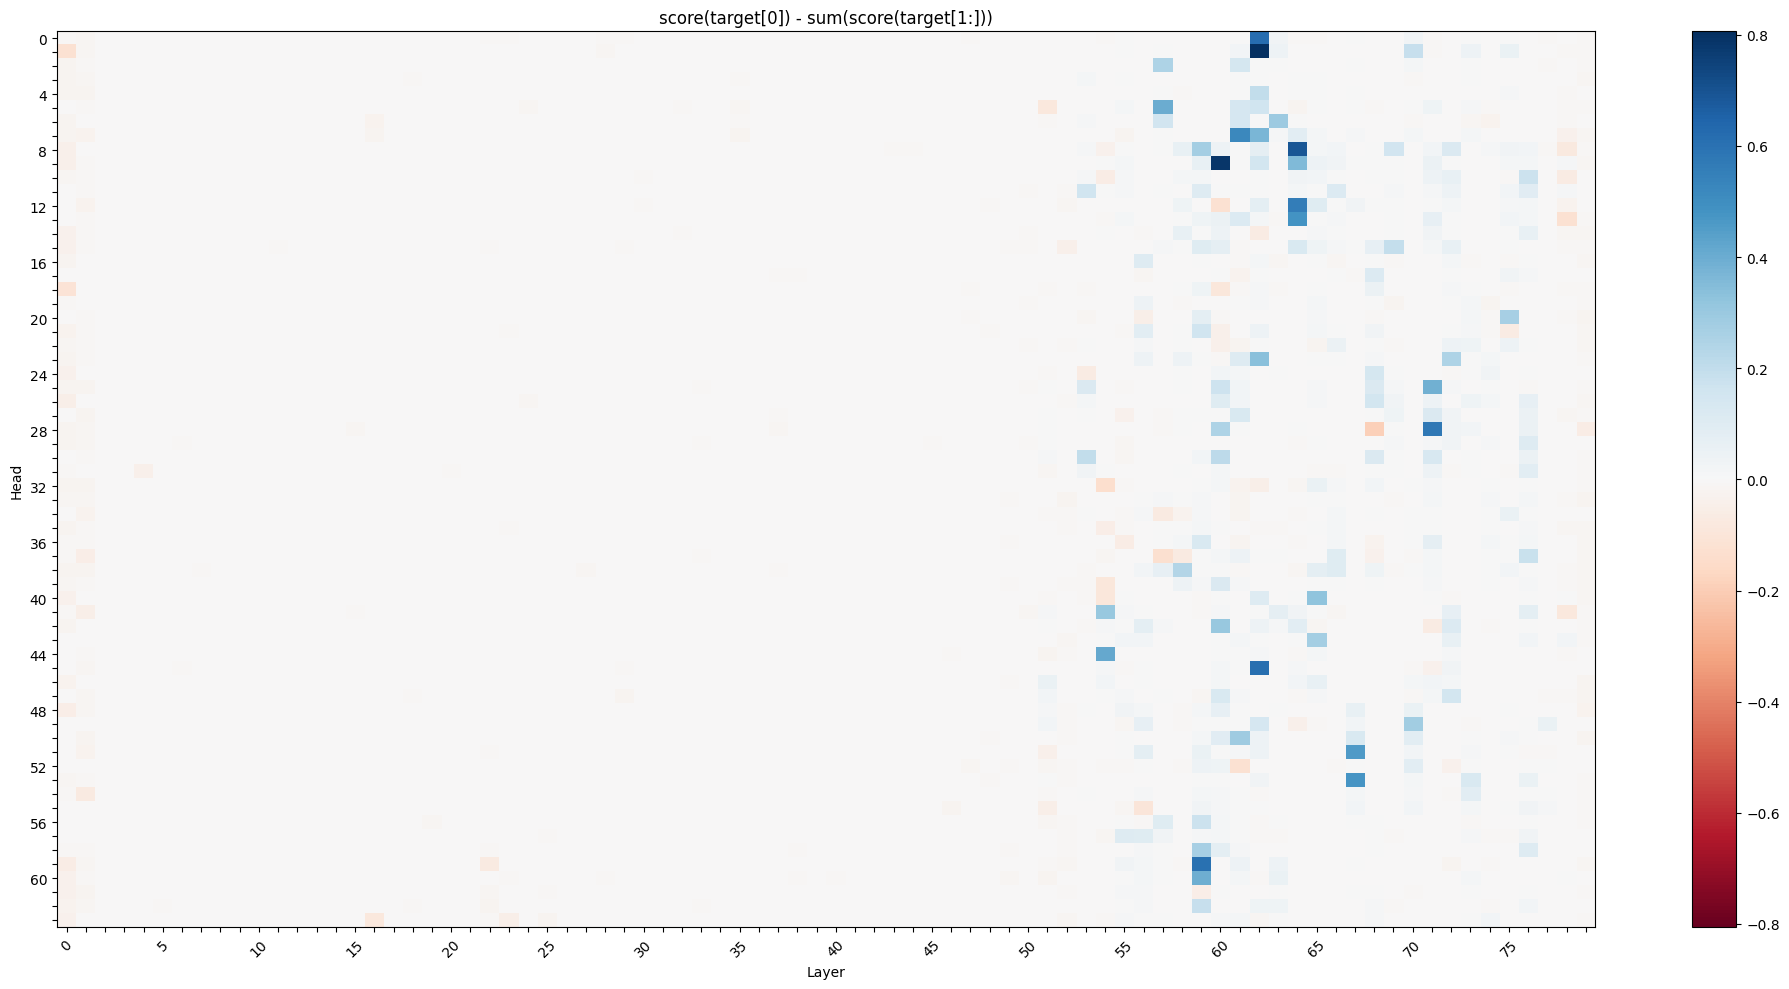

Layer 62, Head 1: 0.8061
Layer 60, Head 9: 0.7835
Layer 64, Head 8: 0.6922
Layer 62, Head 0: 0.6163
Layer 62, Head 45: 0.6103
Layer 59, Head 59: 0.6028
Layer 71, Head 28: 0.5789
Layer 64, Head 12: 0.5582
Layer 61, Head 7: 0.5225
Layer 64, Head 13: 0.4823
Layer 67, Head 53: 0.4784
Layer 67, Head 51: 0.4590
Layer 54, Head 44: 0.4103
Layer 57, Head 5: 0.3988
Layer 59, Head 60: 0.3927


In [66]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 10))
scale = torch.max(torch.abs(resolution_scores))
plt.imshow(
    resolution_scores.cpu().numpy(),
    cmap="RdBu",
    aspect="auto",
    vmin=-scale,
    vmax=scale,
)
plt.colorbar()
# plt.title(f"score(target) - max(score(distractors)) | {token_idx.upper()} tokens of options")
plt.title("score(target[0]) - sum(score(target[1:]))")
plt.xlabel("Layer")
plt.ylabel("Head")

def get_ticks(ticks, skip=5):
    ret = []
    for i in ticks:
        if i % skip == 0:
            ret.append(str(i))
        else:
            ret.append("")
    return ret

plt.xticks(
    ticks=range(n_layer),
    labels=get_ticks(range(n_layer)),
    rotation=45,
)
plt.yticks(
    ticks=range(n_head),
    labels=get_ticks(range(n_head), skip=4),
)

plt.tight_layout()
plt.show()


scores_per_head = []
for head_idx in range(n_head):
    for layer_idx in range(n_layer):
        scores_per_head.append(
            (head_idx, layer_idx, resolution_scores[head_idx, layer_idx].item())
        )

scores_per_head = sorted(scores_per_head, key=lambda x: x[2], reverse=True)
for head_idx, layer_idx, score in scores_per_head[:15]:
    print(f"Layer {layer_idx}, Head {head_idx}: {score:.4f}")

In [30]:
heads_attn_behavior = [(layer_idx, head_idx) for head_idx, layer_idx, score in scores_per_head[:20]]
print(heads_attn_behavior)

[(51, 11), (48, 4), (52, 21), (54, 35), (48, 8), (50, 6), (48, 9), (48, 32), (52, 10), (45, 11), (45, 13), (48, 34), (53, 16), (50, 12), (49, 2), (54, 38), (55, 4), (50, 27), (54, 33), (50, 14)]


#### Based on Patching Score

In [22]:
from scripts.patching_within_task import SelectionQprojPatchResult
from tqdm.auto import tqdm


q_proj_root = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection/q_states_patching",
    # mt.name.split("/")[-1],
    model_key.split("/")[-1],
)

#############################################
# LIMIT = 20
LIMIT = None
# n_layer = mt.n_layer
# n_head = mt.config.num_attention_heads
categories = [
    # "profession",
    # "nationality",
    "objects",
]
#############################################

q_proj_results = {cat: [] for cat in categories}

for category in categories:
    print(f"category: {category}")
    q_proj_path = os.path.join(q_proj_root, category)
    files = sorted(os.listdir(q_proj_path))
    LIMIT = LIMIT or len(files)
    q_proj_results[category] = []
    for file in tqdm(files[:LIMIT]):
        if not file.endswith(".json"):
            continue

        file_path = os.path.join(q_proj_path, file)
        q_proj_results[category].append(SelectionQprojPatchResult.load_from_json(file_path))
        # if len(q_proj_results) % 10 == 0:
        #     print(f"Loaded {len(q_proj_results)}/{LIMIT} files")



category: objects


  0%|          | 0/150 [00:00<?, ?it/s]

In [26]:
import copy
combine_all_results = []
for category in categories:
    combine_all_results.extend(q_proj_results[category])

results_copy = copy.deepcopy(q_proj_results)
results_copy["all"] = combine_all_results

In [27]:
len(results_copy["objects"])

150

In [32]:
heads = combine_all_results[0].headwise_patching_effects.keys()
layers = set([layer for layer, head in heads])
heads = set([head for layer, head in heads])    

2025-08-31 20:30:21 matplotlib.colorbar DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0x7fba78acab50>


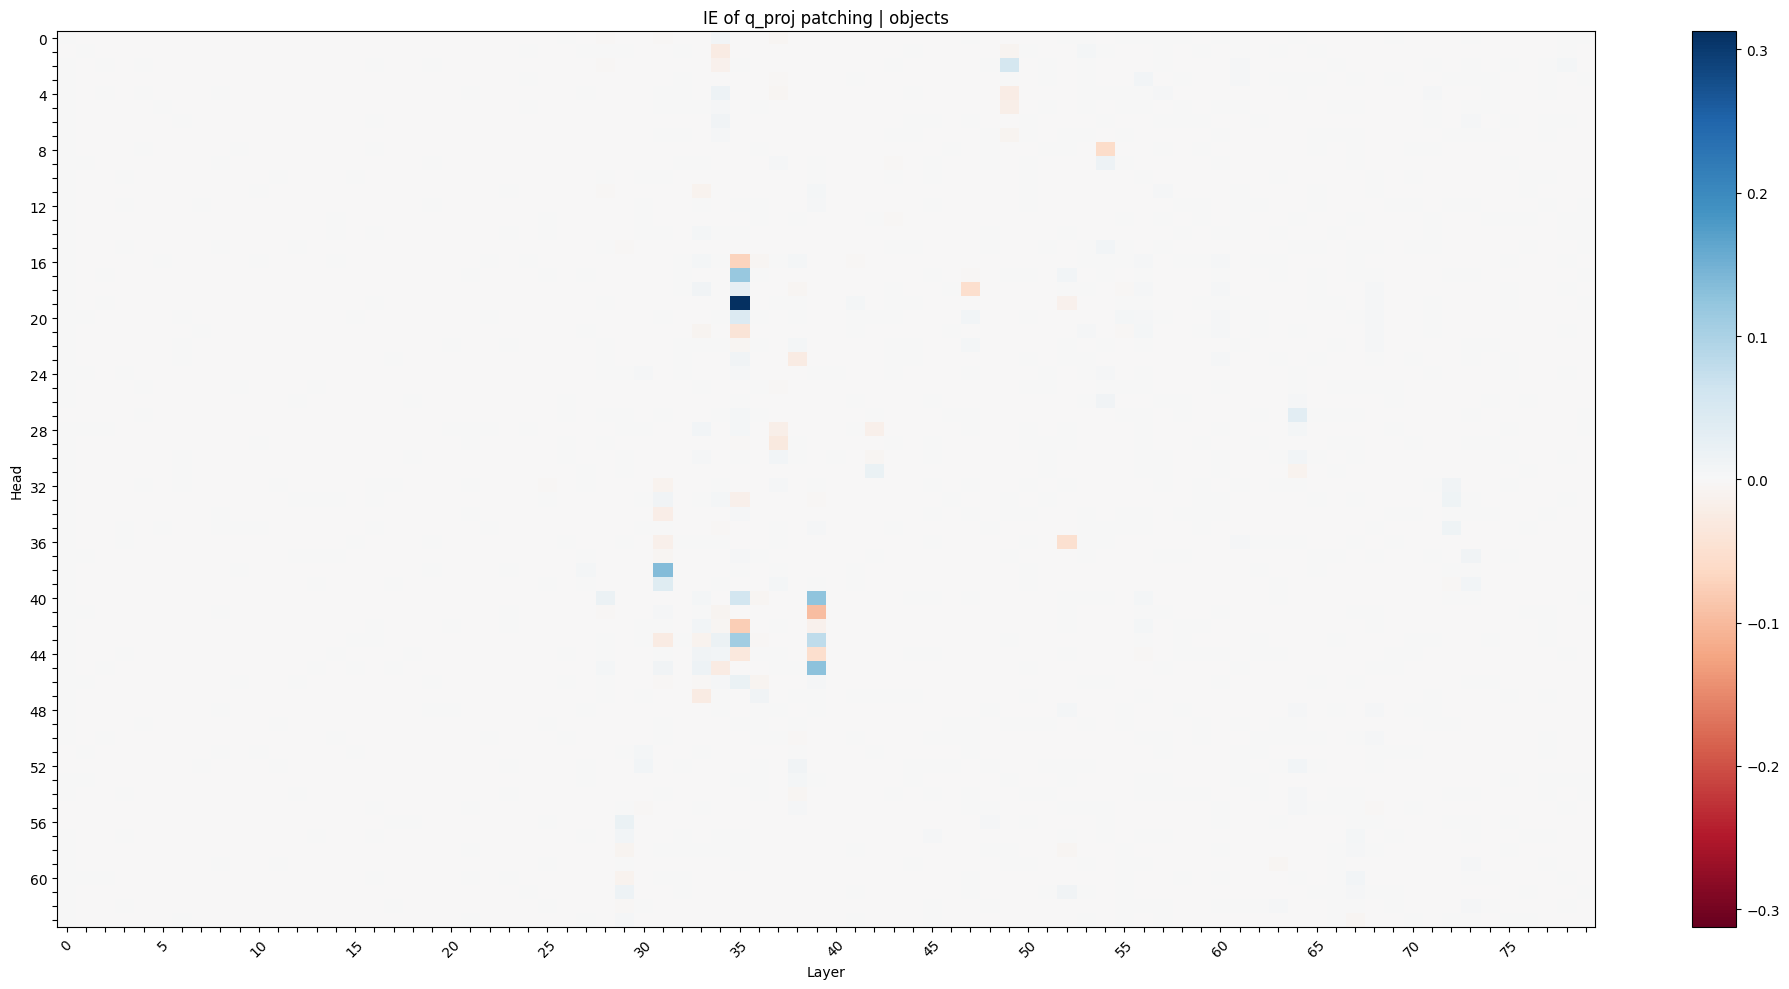

Layer 35, Head 19: 0.3127
Layer 31, Head 38: 0.1344
Layer 39, Head 45: 0.1280
Layer 39, Head 40: 0.1267
Layer 35, Head 17: 0.1187
Layer 35, Head 43: 0.1093
Layer 39, Head 43: 0.0782
Layer 35, Head 40: 0.0585
Layer 49, Head 2: 0.0557
Layer 35, Head 20: 0.0431
Layer 31, Head 39: 0.0375
Layer 64, Head 27: 0.0333
Layer 35, Head 18: 0.0262
Layer 29, Head 56: 0.0206
Layer 42, Head 31: 0.0205
2025-08-31 20:30:23 matplotlib.colorbar DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0x7fbb49049f90>


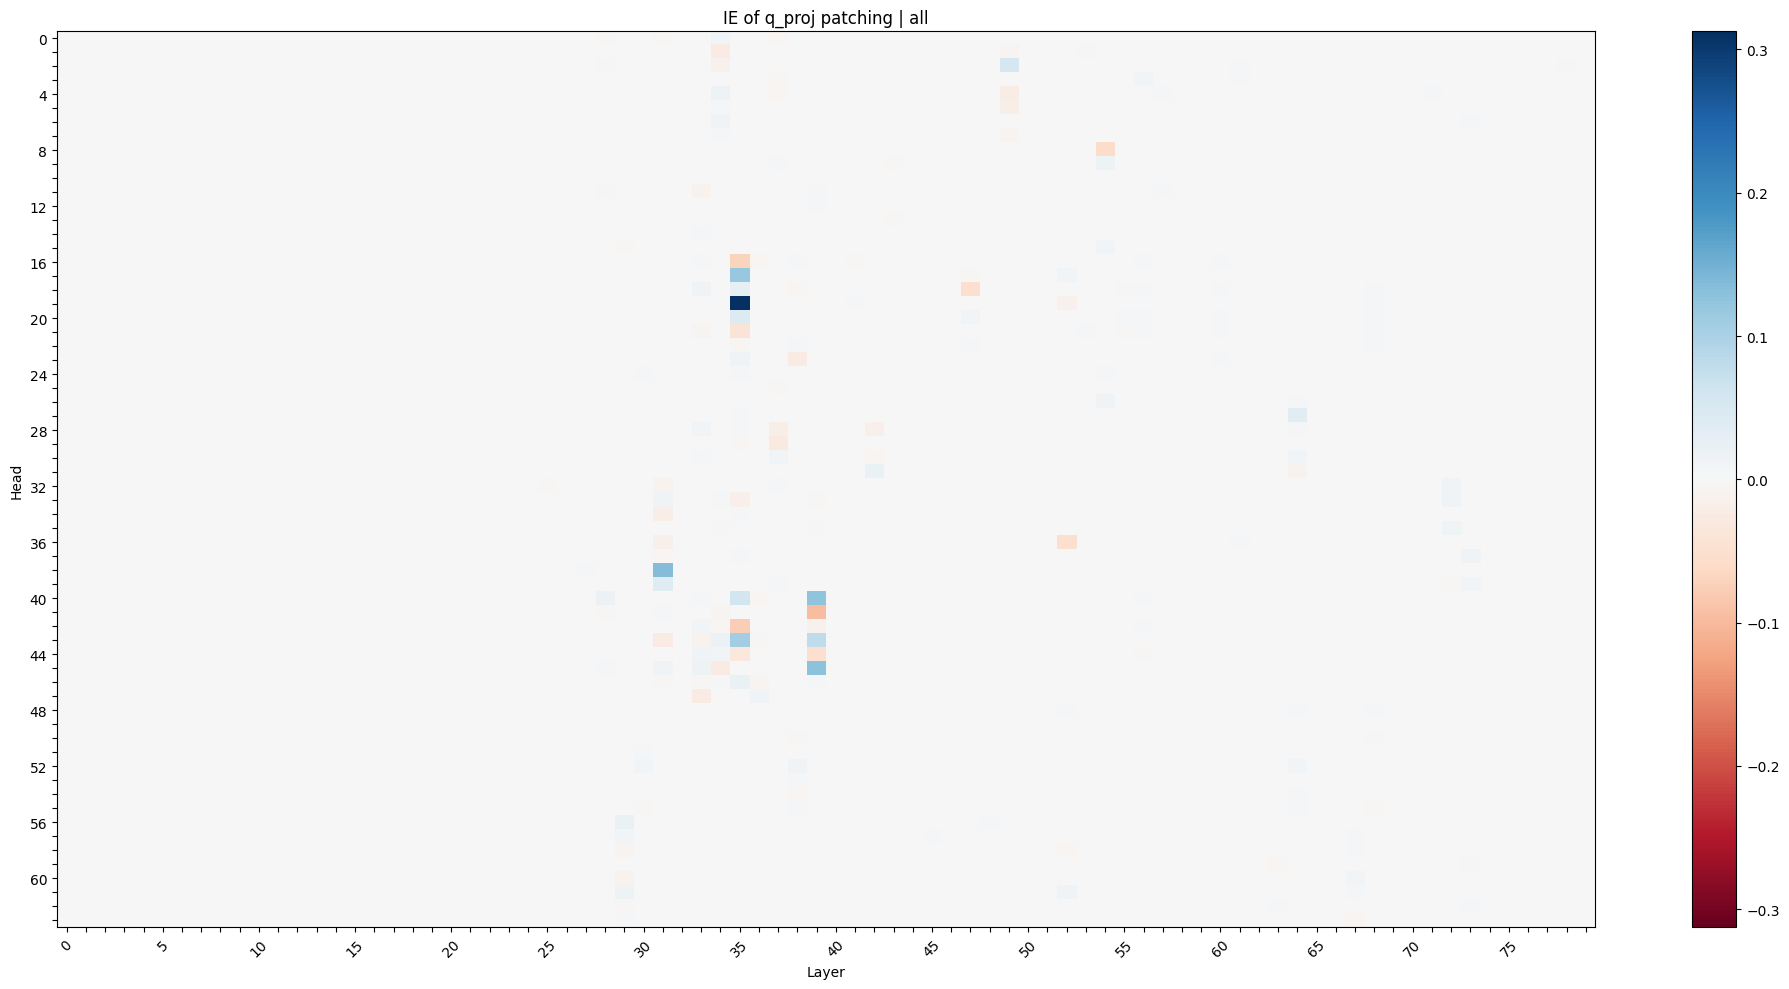

Layer 35, Head 19: 0.3127
Layer 31, Head 38: 0.1344
Layer 39, Head 45: 0.1280
Layer 39, Head 40: 0.1267
Layer 35, Head 17: 0.1187
Layer 35, Head 43: 0.1093
Layer 39, Head 43: 0.0782
Layer 35, Head 40: 0.0585
Layer 49, Head 2: 0.0557
Layer 35, Head 20: 0.0431
Layer 31, Head 39: 0.0375
Layer 64, Head 27: 0.0333
Layer 35, Head 18: 0.0262
Layer 29, Head 56: 0.0206
Layer 42, Head 31: 0.0205


In [34]:
from matplotlib import pyplot as plt

n_layer = len(layers)
n_heads = len(heads)

category_wise_heads = {}
for category, categorywise_result in results_copy.items():
    indirect_effects = torch.zeros((n_layer, n_heads), dtype=torch.float32)
    for layer_idx in range(n_layer):
        for head_idx in range(n_heads):
            indirect_effects[layer_idx, head_idx] = torch.mean(
                torch.tensor(
                    [
                        sample_result.head_effect(layer_idx, head_idx)
                        for sample_result in categorywise_result
                    ]
                )
            )

    plt.figure(figsize=(20, 10))
    scale = torch.max(torch.abs(indirect_effects))
    plt.imshow(
        indirect_effects.T.cpu().numpy(),
        cmap="RdBu",
        aspect="auto",
        vmin=-scale,
        vmax=scale,
    )
    plt.colorbar()
    # plt.title(f"score(target) - max(score(distractors)) | {token_idx.upper()} tokens of options")
    plt.title("IE of q_proj patching | " + category)
    plt.xlabel("Layer")
    plt.ylabel("Head")

    def get_ticks(ticks, skip=5):
        ret = []
        for i in ticks:
            if i % skip == 0:
                ret.append(str(i))
            else:
                ret.append("")
        return ret

    plt.xticks(
        ticks=range(n_layer),
        labels=get_ticks(range(n_layer)),
        rotation=45,
    )
    plt.yticks(
        ticks=range(n_head),
        labels=get_ticks(range(n_head), skip=4),
    )

    plt.tight_layout()
    plt.show()


    scores_per_head = []
    for layer_idx in layers:
        for head_idx in heads:
            scores_per_head.append(
                (layer_idx, head_idx, indirect_effects[layer_idx, head_idx].item())
            )

    scores_per_head = sorted(scores_per_head, key=lambda x: x[2], reverse=True)
    category_wise_heads[category] = scores_per_head
    for layer_idx, head_idx, score in scores_per_head[:15]:
        print(f"Layer {layer_idx}, Head {head_idx}: {score:.4f}")

with open("category_wise_heads.json", "w") as f:
    json.dump(category_wise_heads, f, indent=4)

#### Performing the Patch

In [ ]:
from src.tokens import prepare_input
from src.functional import get_module_nnsight

# HEADS = [
#     (33, 45),
#     (33, 18),
#     (34, 1),
#     (34, 6),
#     (34, 7),
#     (35, 19),
#     (39, 40),
#     (42, 30),
#     (47, 18),
#     (52, 58),
# ]

# HEADS = [
#     (layer_idx, head_idx)
#     for layer_idx, head_idx, score in category_wise_heads["all"][:50]
# ]

# HEADS = heads_selected

clean_tokenized = prepare_input(prompts=clean_sample.prompt(), tokenizer=mt)
patch_tokenized = prepare_input(prompts=patch_sample.prompt(), tokenizer=mt)

# category_wise_heads["all"][len(HEADS) - 1]

In [ ]:
from src.utils.typing import TokenizerOutput


@torch.inference_mode()
def cache_q_projections(
    mt: ModelandTokenizer,
    input: TokenizerOutput,
    query_locations: list[tuple[int, int, int]],  # (layer_idx, head_idx, query_idx)
    return_output: bool = False,
):
    layer_to_hq = {}
    for layer_idx, head_idx, query_idx in query_locations:
        if layer_idx not in layer_to_hq:
            layer_to_hq[layer_idx] = []
        layer_to_hq[layer_idx].append((head_idx, query_idx))

    q_projections = {}
    batch_size = input.input_ids.shape[0]
    seq_len = input.input_ids.shape[1]
    n_heads = mt.config.num_attention_heads
    head_dim = mt.n_embd // n_heads
    with mt.trace(input) as tracer:
        for layer_idx, query_locs in layer_to_hq.items():
            q_proj_name = mt.attn_module_name_format.format(layer_idx) + ".q_proj"
            q_proj_module = get_module_nnsight(mt, q_proj_name)
            q_proj_out = q_proj_module.output.view(
                batch_size, seq_len, n_heads, head_dim
            ).transpose(1, 2)
            for head_idx, query_idx in query_locs:
                q_projections[(layer_idx, head_idx, query_idx)] = (
                    q_proj_out[:, head_idx, query_idx, :].squeeze().save()
                )

        if return_output:
            output = mt.output.save()

    if return_output:
        return q_projections, output
    return q_projections

In [ ]:
query_indices = list(range(-3, 0))
query_locations = [
    (layer_idx, head_idx, query_idx)
    for layer_idx, head_idx in HEADS
    for query_idx in query_indices
]

cached_q_states = cache_q_projections(
    mt=mt,
    input=patch_tokenized,
    query_locations=query_locations,
)

# cached_q_states[(HEADS[0])].shape

In [ ]:
from src.attention import get_attention_matrices, visualize_attn_matrix
from src.functional import interpret_logits

clean_tokenized = prepare_input(prompts=clean_sample.prompt(), tokenizer=mt)

# attn_info = get_attention_matrices(
#     input=clean_tokenized,
#     mt=mt,
# )

# layer_idx, head_idx = 35, 19
# attn_matrix = attn_info.attention_matrices[layer_idx, head_idx].squeeze()
# visualize_attn_matrix(
#     attn_matrix=attn_matrix,
#     tokens=[mt.tokenizer.decode(t) for t in clean_tokenized.input_ids[0]],
#     q_index=-1,
# )

# interpret_logits(
#     tokenizer=mt,
#     logits=attn_info.logits,
#     interested_tokens=[clean_sample.obj_token_id, clean_sample.metadata["track_type_obj_token_id"]]
# )

attn_pattern = verify_head_patterns(
    prompt = clean_tokenized,
    options = clean_sample.options,
    pivot = clean_sample.subj,
    mt = mt,
    heads = HEADS,
    # heads = patching_heads,
    generate_full_answer=True,
)

attn_pattern["predictions"]

In [ ]:
from src.attention import get_attention_matrices, visualize_attn_matrix
from src.functional import patch_with_nnsight, patch_with_baukit, PatchSpec

q_proj_patches = []
for (layer_idx, head_idx, query_idx), q_proj in cached_q_states.items():
    q_proj_patches.append(
        PatchSpec(
            location=(mt.attn_module_name_format.format(layer_idx) + ".q_proj", head_idx, query_idx),
            patch=q_proj
        )
    )

# patched_attn_info = get_attention_matrices(
#     input=clean_tokenized,
#     mt=mt,
#     patches=q_proj_patches,
#     patch_interface=patch_with_baukit
# )

# layer_idx, head_idx = 35, 19
# patched_attn_matrix = patched_attn_info.attention_matrices[layer_idx, head_idx].squeeze()
# visualize_attn_matrix(
#     attn_matrix=patched_attn_matrix,
#     tokens=[mt.tokenizer.decode(t) for t in clean_tokenized.input_ids[0]],
#     q_index=-1,
# )

# interpret_logits(
#     tokenizer=mt,
#     logits=patched_attn_info.logits,
#     interested_tokens=[clean_sample.obj_token_id, clean_sample.metadata["track_type_obj_token_id"]]
# )

patched_attn_pattern = verify_head_patterns(
    prompt = clean_tokenized,
    options = clean_sample.options,
    pivot = clean_sample.subj,
    mt = mt,
    heads = HEADS,
    # heads = patching_heads,
    query_patches=q_proj_patches,
    # generate_full_answer=True,
)

patched_attn_pattern["predictions"]

### Search over layers and heads

In [ ]:
clean_sample.metadata

In [ ]:
from scripts.patching_within_task import SelectionQprojPatchResult

In [ ]:
from itertools import product
from src.functional import patch_with_baukit, interpret_logits
from src.selection.functional import cache_q_projections

all_heads = list(product(range(20, 30), range(mt.config.num_attention_heads)))
query_indices = {-3: -3, -2: -2, -1: -1}

clean_tokenized = prepare_input(prompts=clean_sample.prompt(), tokenizer=mt)
patch_tokenized = prepare_input(prompts=patch_sample.prompt(), tokenizer=mt)

interested_tokens = [
    patch_sample.ans_token_id,
    clean_sample.ans_token_id,
    clean_sample.metadata["track_type_obj_token_id"]
]


query_locations = [
    (layer_idx, head_idx, patch_query_idx)
    for layer_idx, head_idx in all_heads
    for patch_query_idx in query_indices.keys()
]

all_q_projections, patch_out = cache_q_projections(
    mt=mt,
    input=patch_tokenized,
    query_locations=query_locations,
    return_output=True,
)
logger.debug(len(all_q_projections))

patch_logits = patch_out.logits[:, -1, :].squeeze()
patch_precitions, patch_track = interpret_logits(
    tokenizer=mt,
    logits=patch_logits,
    interested_tokens=interested_tokens,
)

patch_precitions, patch_track

In [ ]:
clean_out = patch_with_baukit(
    mt=mt,
    inputs=clean_tokenized,
    patches=[],
)

base_logits = clean_out.logits[:, -1, :].squeeze()
base_predictions, base_track = interpret_logits(
    tokenizer=mt,
    logits=base_logits,
    interested_tokens=interested_tokens,
)
base_predictions, base_track

In [ ]:
from src.functional import PatchSpec
q_proj_patches = []
for (layer_idx, head_idx, patch_query_idx), q_proj in all_q_projections.items():
    q_proj_patches.append(
        PatchSpec(
            location=(
                mt.attn_module_name_format.format(layer_idx) + ".q_proj",
                head_idx,
                query_indices[patch_query_idx],
            ),
            patch=q_proj,
        )
    )

int_out = patch_with_baukit(
    mt = mt,
    inputs = clean_tokenized,
    patches = q_proj_patches,
)

logits = int_out.logits[:, -1, :].squeeze()

interpret_logits(
    tokenizer=mt,
    logits=logits,
    interested_tokens=interested_tokens
)

In [ ]:
len(all_q_projections)

In [ ]:
list(all_q_projections.keys())[:5]

In [ ]:
from tqdm.auto import tqdm
head_wise_patching_effects = {}

for (layer_idx, head_idx) in tqdm(all_heads):
    q_proj_patch = []
    for patch_tok_idx, clean_tok_idx in query_indices.items():
        q_proj_patch.append(
            PatchSpec(
                location=(
                    mt.attn_module_name_format.format(layer_idx) + ".q_proj", 
                    head_idx, 
                    query_indices[patch_tok_idx]
                ),
                patch=all_q_projections[(layer_idx, head_idx, patch_tok_idx)]
            )
        )
    out = patch_with_baukit(
        mt = mt,
        inputs = clean_tokenized,
        patches = q_proj_patch,
    )
    logits = out.logits[:, -1, :].squeeze()
    predictions, track = interpret_logits(
        tokenizer=mt,
        logits=logits,
        interested_tokens=interested_tokens
    )
    head_wise_patching_effects[(layer_idx, head_idx)] = track

In [ ]:
patching_results = SelectionQprojPatchResult(
    patch_sample=patch_sample,
    clean_sample=clean_sample,
    interested_tokens=interested_tokens,
    base_results=base_track,
    gold_results=patch_track,
    headwise_patching_effects=head_wise_patching_effects
)

In [ ]:
patching_results.head_effect(layer_idx=25, head_idx=19)

In [ ]:
headwise_scores = [
    (
        layer_idx,
        head_idx,
        patching_results.head_effect(layer_idx, head_idx)
    )
    for layer_idx, head_idx in head_wise_patching_effects.keys()
]

headwise_scores = sorted(headwise_scores, key=lambda x: x[2], reverse=True)
patching_heads = []
for layer_idx, head_idx, score in headwise_scores[:15]:
    print(f"Layer {layer_idx}, Head {head_idx}: {score:.4f}")
    patching_heads.append((layer_idx, head_idx))

In [ ]:
patching_results.patch_sample.metadata.pop("tokenized")
patching_results.clean_sample.metadata.pop("tokenized")

In [ ]:
patching_results.delist_patching_effects()


In [ ]:
with open("patching_results.json", "w") as f:
    json.dump(patching_results.to_dict(), f, indent=4)

In [ ]:
with open("patching_results.json", "r") as f:
    loaded_results = json.load(f)

loaded_results["headwise_patching_effects"] = {
    (int(layer_idx.split("_<>_")[0]), int(layer_idx.split("_<>_")[1])): effect
    for layer_idx, effect in loaded_results["headwise_patching_effects"].items()
}

In [ ]:
loaded_results["headwise_patching_effects"].keys()

In [ ]:
patching_results_loaded = SelectionQprojPatchResult.from_dict(loaded_results)
patching_results_loaded.head_effect(layer_idx=25, head_idx=19)

In [ ]:
mt.config.num_attention_heads

## Optimization to select heads to patch

In [29]:
from src.functional import free_gpu_cache
free_gpu_cache()

#################################################################################
train_limit = 512
# prompt_template_idx = 1
prompt_template_idx = 3
N_DISTRACTORS = 5
OPTION_STYLE = "single_line"
#################################################################################

train_set = []
while len(train_set) < train_limit:
    print(f"sample {len(train_set)+1}/{train_limit}")
    patch, clean = get_counterfactual_samples_within_task(
        mt=mt,
        task=select_task,
        filter_by_lm_prediction=True,
        prompt_template_idx=prompt_template_idx,
        option_style=OPTION_STYLE,
        distinct_options=True,
        patch_n_distractors=N_DISTRACTORS,
        clean_n_distractors=N_DISTRACTORS,
    )
    train_set.append((clean, patch))

sample 1/512
2025-09-09 00:33:33 src.selection.data INFO     clean_obj_idx=1 | ['Orange', 'Museum', 'Horse', 'Skis', 'Lettuce', 'Peony']
type(task)=<class 'src.selection.data.SelectOneTask'>
2025-09-09 00:33:33 src.selection.data INFO     Options: Shirt, Mango, Submarine, Factory, Bathtub, Boxing gloves.
Which among these objects mentioned above is a sport equipment?
Answer:
2025-09-09 00:33:33 src.selection.data INFO     Hockey stick | sport equipment -> Boxing gloves | pred=['" Boxing"[72683] (p=0.852, logit=21.250)', '" The"[578] (p=0.070, logit=18.750)', '" Among"[22395] (p=0.029, logit=17.875)', '" It"[1102] (p=0.004, logit=16.000)', '" Option"[7104] (p=0.003, logit=15.750)']
2025-09-09 00:33:33 src.selection.data INFO     Options: Orange, Museum, Horse, Skis, Lettuce, Peony.
Which among these objects mentioned above is a building?
Answer:
2025-09-09 00:33:33 src.selection.data INFO     Apartment | building -> Museum | pred=['" Museum"[16730] (p=0.848, logit=21.625)', '" A"[362] (

In [30]:
mt._model.zero_grad()
free_gpu_cache()
len(train_set)

512

In [32]:
from src.selection.optimization import get_optimal_head_mask_optimized, get_optimal_head_mask_prev
import numpy as np

free_gpu_cache()

optimization_interface = {
    "legacy": get_optimal_head_mask_prev,
    "updated": get_optimal_head_mask_optimized,
}

#############################
intface = "legacy"
#############################

optimized_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection/test_localization_code",
    mt.name.split("/")[-1],
    f"{TASK_CLS.task_name}",
)

optimization_func = optimization_interface[intface]

indices_kwargs = {"query_indices": [-2, -1]}
if intface == "legacy":
    optimized_path = os.path.join(optimized_path, "legacy")
    indices_kwargs["query_indices"] = [-3, -2, -1]
elif intface == "updated":
    indices_kwargs["add_ques_pos_to_query_indices"] = True

optimal_mask, losses = optimization_func(
    mt=mt,
    train_set=train_set,
    learning_rate=1e-2,
    n_epochs=5,
    lamb=2e-2,
    batch_size=16,
    save_step=2,
    save_path=optimized_path,
    # black_list_heads=optimized_heads
    **indices_kwargs
)

os.makedirs(os.path.dirname(optimized_path), exist_ok=True)

np.savez_compressed(
    optimized_path,
    **dict(
        optimal_mask=optimal_mask.to(torch.float32).numpy(),
        losses=np.array(losses, dtype=np.float32),
    ),
    allow_pickle=True,
)

2025-09-09 00:39:28 src.selection.optimization DEBUG    Training with hparams: {'learning_rate': 0.01, 'n_epochs': 5, 'lamb': 0.02, 'batch_size': 16}
2025-09-09 00:39:28 src.selection.optimization INFO     Starting training...
2025-09-09 00:39:32 src.selection.optimization DEBUG    Epoch=1 | batch_idx=0 |>> -14.7500 + 13.6250 + 102.5000 = 101.5000


OutOfMemoryError: CUDA out of memory. Tried to allocate 448.00 MiB. GPU 5 has a total capacity of 79.25 GiB of which 225.69 MiB is free. Process 869538 has 50.83 GiB memory in use. Including non-PyTorch memory, this process has 28.17 GiB memory in use. Of the allocated memory 27.49 GiB is allocated by PyTorch, and 179.95 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

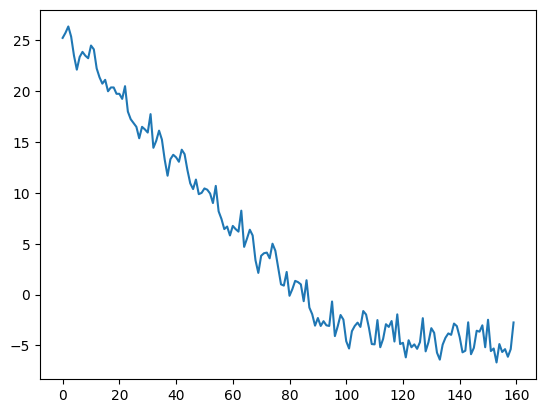

In [94]:
from matplotlib import pyplot as plt

optimized_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection/test_localization_code",
    mt.name.split("/")[-1],
    f"{TASK_CLS.task_name}",
    "legacy",
    "epoch_5.npz",
)

optimization_results = np.load(optimized_path, allow_pickle=True)
plt.plot(optimization_results["losses"])

88


(False, False)

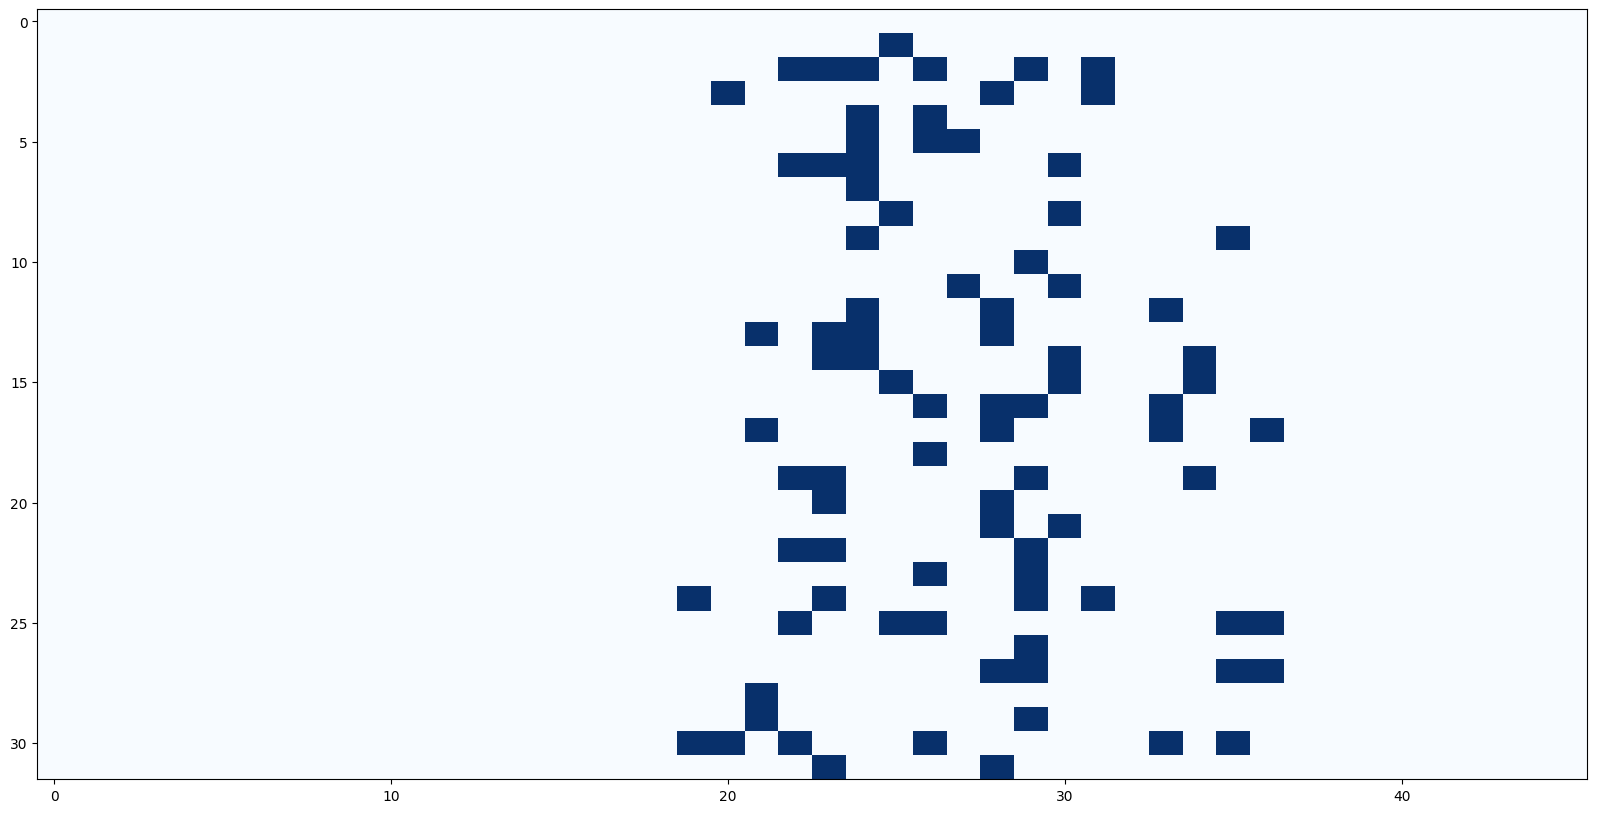

In [95]:
plt.figure(figsize=(20, 10))

optimal_head_mask = torch.tensor(optimization_results["optimal_mask"]).to(torch.float32)
# optimal_head_mask[50:, :] = 0.0
# optimal_head_mask[75:, :] = 0.0
optimal_head_mask[37:, :] = 0.0

plt.imshow(
    optimal_head_mask.T.numpy(),
    cmap="Blues",
    aspect="auto",
    vmin=0,
    vmax=1,
)

optimized_heads = torch.nonzero(optimal_head_mask > 0.5, as_tuple=False).to(dtype=torch.int).tolist()
optimized_heads = [
    (layer_idx, head_idx) for layer_idx, head_idx in optimized_heads
]
print(len(optimized_heads))

HEADS = optimized_heads

(35, 19) in HEADS, (35, 19) in optimized_heads

In [81]:
len(optimized_heads)

78

## Validation of the patching effect

In [82]:
from src.functional import free_gpu_cache
free_gpu_cache()
validation_set = []
validation_limit = 256

while len(validation_set) < validation_limit:
    print(f"sample {len(validation_set)+1} / {validation_limit}")
    patch, clean = get_counterfactual_samples_within_task(
        mt=mt,
        task=select_task,
        filter_by_lm_prediction=True,
        prompt_template_idx=prompt_template_idx,
        option_style=OPTION_STYLE,
        distinct_options=True,
        # n_distractors=N_DISTRACTORS,
        patch_n_distractors=N_DISTRACTORS,
        clean_n_distractors=N_DISTRACTORS
    )
    validation_set.append((clean, patch))

len(validation_set)

sample 1 / 256
2025-09-09 00:05:08 src.selection.data INFO     clean_obj_idx=0 | ['Jasmine', 'Spinach', 'Hickory', 'Bed', 'Scarf', 'Sink']
type(task)=<class 'src.selection.data.SelectOneTask'>
2025-09-09 00:05:09 src.selection.data INFO     Options: Harp, Comb, Coffee table, Socks, Helmet, Chrysanthemum.
Which among these objects mentioned above is a clothing?
Answer:
2025-09-09 00:05:09 src.selection.data INFO     Jacket | clothing -> Socks | pred=['" Socks"[114288] (p=0.949, logit=22.250)', '" **"[5231] (p=0.047, logit=19.250)', '"\n\n"[109] (p=0.001, logit=15.000)', '"  "[139] (p=0.001, logit=14.750)', '"\n"[108] (p=0.000, logit=13.500)']
2025-09-09 00:05:09 src.selection.data INFO     Options: Jasmine, Spinach, Hickory, Bed, Scarf, Sink.
Which among these objects mentioned above is a flower?
Answer:
2025-09-09 00:05:09 src.selection.data INFO     Iris | flower -> Jasmine | pred=['" Jasmine"[91076] (p=0.891, logit=21.375)', '" **"[5231] (p=0.106, logit=19.250)', '"  "[139] (p=0.001,

256

In [83]:
from typing import Any, Optional
from src.utils.typing import TokenizerOutput
from src.functional import get_module_nnsight, PatchSpec, patch_with_baukit
import baukit
import types
from src.hooking.llama_attention import LlamaAttentionPatcher
from src.attention import visualize_attn_matrix


@torch.inference_mode()
def cache_q_projections(
    mt: ModelandTokenizer,
    input: TokenizerOutput,
    heads: list[tuple[int, int]],  # (layer_idx, head_idx)
    token_indices: list[list[int]],
    return_output: bool = False,
    projection_signature: str = ".q_proj",
):
    batch_size = input.input_ids.shape[0]
    assert len(token_indices) == batch_size, f"{len(token_indices)=} != {batch_size=}"
    layer_to_head = {}
    for layer_idx, head_idx in heads:
        if layer_idx not in layer_to_head:
            layer_to_head[layer_idx] = []
        layer_to_head[layer_idx].append(head_idx)

    seq_len = input.input_ids.shape[1]
    n_heads = mt.config.num_attention_heads
    # head_dim = mt.n_embd // n_heads
    head_dim = get_module_nnsight(
        mt._model, mt.attn_module_name_format.format(0)
    ).head_dim
    group_size = n_heads // mt.config.num_key_value_heads
    q_module_projections_per_layer = {}
    with mt.trace(input) as tracer:  # noqa
        for layer_idx, head_indices in layer_to_head.items():
            q_proj_name = (
                mt.attn_module_name_format.format(layer_idx) + projection_signature
            )
            q_proj_module = get_module_nnsight(mt, q_proj_name)
            q_module_projections_per_layer[q_proj_name] = q_proj_module.output.save()

        if return_output:
            output = mt.output.save()

    q_projections = [{} for _ in range(batch_size)]
    for layer_idx, head_indices in layer_to_head.items():
        q_proj_name = (
            mt.attn_module_name_format.format(layer_idx) + projection_signature
        )
        # print(q_proj_name)
        q_proj_out = (
            q_module_projections_per_layer[q_proj_name]
            .view(batch_size, seq_len, -1, head_dim)
            .transpose(1, 2)
        )
        if projection_signature in [".k_proj", ".v_proj"] and group_size != 1:
            q_proj_out = repeat_kv(q_proj_out, n_rep=group_size)
        # print(q_proj_out.shape, q_proj_out.norm())
        for prompt_idx in range(batch_size):
            for head_idx in head_indices:
                for token_idx in token_indices[prompt_idx]:
                    q_projections[prompt_idx][(layer_idx, head_idx, token_idx)] = (
                        q_proj_out[prompt_idx, head_idx, token_idx]
                    )

    if return_output:
        return q_projections, output
    return q_projections


def locate_with_delim(prompt, option):
    st = prompt.index(option)
    return prompt[st : st + len(option) + 1]


@torch.no_grad()
def validate_q_proj_ie_on_sample_pair(
    mt: ModelandTokenizer,
    clean_sample: SelectionSample,
    patch_sample: SelectionSample,
    heads: list[tuple[int, int]],
    query_indices: dict[int, int] = {-1: -1},  # patch_idx -> clean_idx
    verify_head_behavior_on: Optional[int] = None,
    ablate_possible_ans_info_from_options: bool = False,
    amplification_scale: float = 1.0,
    must_track_tokens: list[int] = [],
    patch_args: dict[str, Any] = {},
):
    clean_tokenized = prepare_input(prompts=clean_sample.prompt(), tokenizer=mt)
    patch_tokenized = prepare_input(prompts=patch_sample.prompt(), tokenizer=mt)
    if patch_args.get("batch_size", 1) > 1:
        patch_samples = []
        task = patch_args["task"]
        logger.debug(f"Sampling {patch_args.get('batch_size', 1)} patch samples...")
        while len(patch_samples) < patch_args.get("batch_size", 1):
            obj_idx = len(patch_samples) % len(patch_sample.options)
            if patch_args["distinct_options"] is True:
                sample = task.get_random_sample(
                    mt=mt,
                    category=patch_sample.category,
                    prompt_template_idx=patch_args["prompt_template_idx"],
                    option_style=patch_args["option_style"],
                    filter_by_lm_prediction=True,
                    exclude_objs=[clean_sample.obj, patch_sample.obj],
                    n_distractors=patch_args["n_distractors"],
                    obj_idx=obj_idx,
                )
            else:
                sample = copy.deepcopy(patch_sample)
                sample.options[obj_idx], sample.options[sample.obj_idx] = (
                    sample.options[sample.obj_idx],
                    sample.options[obj_idx],
                )
                sample.obj_idx = obj_idx
                # random.shuffle(sample.options)
            patch_samples.append(sample)
        patch_tokenized_batch = prepare_input(
            prompts=[sample.prompt() for sample in patch_samples], tokenizer=mt
        )
        logger.debug(f"{patch_tokenized_batch.input_ids.shape}")

    if verify_head_behavior_on is not None:
        logger.info("Verifying head behavior...")

        logger.info(f"Clean Sample >> Ans: {clean_sample.obj}")
        clean_attn_pattern = verify_head_patterns(  # noqa
            prompt=clean_sample.prompt(),
            tokenized_prompt=clean_tokenized,
            options=(
                [
                    locate_with_delim(clean_sample.prompt(), opt)
                    for opt in clean_sample.options
                ]
                if ablate_possible_ans_info_from_options
                else clean_sample.options
            ),
            pivot=clean_sample.subj,
            mt=mt,
            heads=heads,
            generate_full_answer=True,
            query_index=verify_head_behavior_on,
            ablate_possible_ans_info_from_options=ablate_possible_ans_info_from_options,
        )

        logger.info(f"Patch Sample >> Ans: {patch_sample.obj}")
        patch_attn_pattern = verify_head_patterns(  # noqa
            prompt=patch_sample.prompt(),
            tokenized_prompt=patch_tokenized,
            options=(
                [
                    locate_with_delim(patch_sample.prompt(), opt)
                    for opt in patch_sample.options
                ]
                if ablate_possible_ans_info_from_options
                else patch_sample.options
            ),
            pivot=patch_sample.subj,
            mt=mt,
            heads=heads,
            generate_full_answer=True,
            query_index=verify_head_behavior_on,
            ablate_possible_ans_info_from_options=ablate_possible_ans_info_from_options,
        )

    logger.info(f"Caching the query states for the {len(heads)} heads")

    cached_q_states, patch_output = cache_q_projections(
        mt=mt,
        input=patch_tokenized,
        heads=heads,
        token_indices=[list(query_indices.keys())],
        return_output=True,
    )
    if patch_args.get("batch_size", 1) > 1:
        cached_q_states = cache_q_projections(
            mt=mt,
            input=patch_tokenized_batch,
            heads=heads,
            token_indices=[list(query_indices.keys())]
            * patch_args.get("batch_size", 1),
            return_output=False,
        )
        mean_q_states = {}
        for prompt_idx in range(patch_args.get("batch_size", 1)):
            for key, value in cached_q_states[prompt_idx].items():
                if key not in mean_q_states:
                    mean_q_states[key] = []
                mean_q_states[key].append(value)
        for key, value in mean_q_states.items():
            mean_q_states[key] = torch.mean(torch.stack(value), dim=0)
        cached_q_states = [mean_q_states]

    q_proj_patches = []
    for (layer_idx, head_idx, patch_query_idx), q_proj in cached_q_states[0].items():
        q_proj_patches.append(
            PatchSpec(
                location=(
                    mt.attn_module_name_format.format(layer_idx) + ".q_proj",
                    head_idx,
                    query_indices[patch_query_idx],
                ),
                patch=q_proj,
            )
        )

    patch_logits = patch_output.logits[:, -1, :].squeeze()
    patch_predictions = interpret_logits(
        tokenizer=mt,
        logits=patch_logits,
    )
    logger.info(f"patch_prediction={[str(pred) for pred in patch_predictions]}")

    # interested_tokens = [
    #     patch_sample.ans_token_id,
    #     clean_sample.ans_token_id,
    #     clean_sample.metadata["track_type_obj_token_id"],
    # ]
    interested_tokens = clean_sample.options
    interested_tokens = [
        get_first_token_id(name=opt, tokenizer=mt.tokenizer, prefix=" ")
        for opt in interested_tokens
    ]
    # interested_tokens += [patch_sample.ans_token_id]
    # interested_tokens = list(set(interested_tokens))  # remove duplicates #! don't need to, made sure during sampling

    logger.info("clean run")
    clean_output = patch_with_baukit(
        mt=mt,
        inputs=clean_tokenized,
        patches=[],
    )
    clean_logits = clean_output.logits[:, -1, :].squeeze()
    clean_predictions, clean_track = interpret_logits(
        tokenizer=mt,
        logits=clean_logits,
        interested_tokens=interested_tokens + must_track_tokens,
    )
    logger.info(f"clean_prediction={[str(pred) for pred in clean_predictions]}")
    logger.info(f"clean_track={clean_track}")

    logger.info("patching the q_proj states")

    if verify_head_behavior_on is not None and amplification_scale == 1.0:
        int_attn_pattern = verify_head_patterns(
            prompt=clean_sample.prompt(),
            tokenized_prompt=clean_tokenized,
            options=(
                [
                    locate_with_delim(clean_sample.prompt(), opt)
                    for opt in clean_sample.options
                ]
                if ablate_possible_ans_info_from_options
                else clean_sample.options   
            ),
            pivot=clean_sample.subj,
            mt=mt,
            heads=heads,
            query_patches=q_proj_patches,
            generate_full_answer=False,
            query_index=verify_head_behavior_on,
            ablate_possible_ans_info_from_options=ablate_possible_ans_info_from_options,
        )
        int_logits = int_attn_pattern["logits"].squeeze()

    else:
        default_attn_implementation = mt.config._attn_implementation
        if amplification_scale != 1.0:
            mt.reset_forward()
            mt.set_attn_implementation("sdpa")

            layers_to_heads = {}
            for layer_idx, head_idx in heads:
                if layer_idx not in layers_to_heads:
                    layers_to_heads[layer_idx] = []
                layers_to_heads[layer_idx].append(head_idx)

            layers_to_q_patches = {}
            for (
                layer_idx,
                head_idx,
                patch_query_idx,
            ), patch in cached_q_states[0].items():
                if layer_idx not in layers_to_q_patches:
                    layers_to_q_patches[layer_idx] = []
                layers_to_q_patches[layer_idx].append(
                    (head_idx, query_indices[patch_query_idx], patch)
                )

            attention_patterns = {}
            head_contributions = {}
            for layer_idx, head_indices in layers_to_heads.items():
                attn_block_name = mt.attn_module_name_format.format(layer_idx)
                attn_block = baukit.get_module(mt._model, attn_block_name)

                attention_patterns[layer_idx] = {}
                head_contributions[layer_idx] = {}

                attn_block.forward = types.MethodType(
                    LlamaAttentionPatcher(
                        block_name=attn_block_name,
                        save_attn_for=head_indices,
                        store_attn_matrices=attention_patterns[layer_idx],
                        store_head_contributions=head_contributions[layer_idx],
                        query_patches=layers_to_q_patches[layer_idx],
                        amplify_contributions=[
                            (head_idx, q_idx, amplification_scale)
                            for head_idx in head_indices
                            for q_idx in query_indices.values()
                        ],
                        # value_weighted=True,
                    ),
                    attn_block,
                )
            patches = []  # already handled by hooking the default forward pass

        else:
            patches = q_proj_patches

        if ablate_possible_ans_info_from_options:
            patches.extend(
                get_patches_to_verify_independent_enrichment(
                    prompt=clean_sample.prompt(),
                    options=clean_sample.options,
                    pivot=clean_sample.subj,
                    mt=mt,
                    tokenized_prompt=clean_tokenized,
                )
            )

        int_out = patch_with_baukit(
            mt=mt,
            inputs=clean_tokenized,
            patches=patches,
        )
        int_logits = int_out.logits[:, -1, :].squeeze()

        if amplification_scale != 1.0:
            mt.reset_forward()
            mt.set_attn_implementation(default_attn_implementation)

            if verify_head_behavior_on is not None:
                attn_matrix = []
                for layer_idx in attention_patterns:
                    for head_idx in attention_patterns[layer_idx]:
                        attn_matrix.append(
                            attention_patterns[layer_idx][head_idx].cpu()
                        )

                attn_matrix = torch.stack(attn_matrix).squeeze()
                if attn_matrix.dim() == 3:
                    attn_matrix = attn_matrix.mean(dim=0)

                visualize_attn_matrix(
                    attn_matrix=attn_matrix,
                    tokens=[
                        mt.tokenizer.decode(t) for t in clean_tokenized["input_ids"][0]
                    ],
                )

    int_predictions, int_track = interpret_logits(
        tokenizer=mt,
        logits=int_logits,
        interested_tokens=interested_tokens + must_track_tokens,
    )
    logger.info(f"int_prediction={[str(pred) for pred in int_predictions]}")
    logger.info(f"int_track={int_track}")

    return {
        "clean_sample": clean_sample,
        "patch_sample": patch_sample,
        "clean_predictions": clean_predictions,
        "patch_predictions": patch_predictions,
        "int_predictions": int_predictions,
        "clean_track": clean_track,
        "int_track": int_track,
    }

In [84]:
# from src.selection.optimization import validate_q_proj_ie_on_sample_pair

# clean, patch = copy.deepcopy(validation_set[38])
# clean.default_option_style="numbered"
# patch.default_option_style="numbered"
# clean, patch = train_set[18]

clean, patch = copy.deepcopy(clean_sample), copy.deepcopy(patch_sample)

# failed_case = failed_cases[27]
# clean = failed_case["clean_sample"]
# patch = failed_case["patch_sample"]

print(clean.prompt(), ">>", clean.obj)
print(patch.prompt(), ">>", patch.obj)

mt.set_attn_implementation("eager")
mt.reset_forward()

validation_result = validate_q_proj_ie_on_sample_pair(
    mt=mt,
    clean_sample=clean,
    patch_sample=patch,
    heads=optimized_heads,
    # heads=sorted(qwen_32_heads, key=lambda x: (x[0], x[1])),
    # heads=sorted(heads_attn_behavior, key=lambda x: (x[0], x[1])),
    # heads=[(35, 19)],
    query_indices={
        patch.metadata["ques_pos"]: clean.metadata["ques_pos"],
        -2: -2,
        -1: -1,
    },
    verify_head_behavior_on=-1,
    # ablate_possible_ans_info_from_options=True,
    # amplification_scale=2.0
    # patch_args={
    #     "batch_size": N_DISTRACTORS + 1,
    #     "task": select_task,
    #     "prompt_template_idx": prompt_template_idx,
    #     "option_style": patch.default_option_style,
    #     "distinct_options": False,
    #     "n_distractors": N_DISTRACTORS,
    # },
)

clean_obj = clean.ans_token_id
target_obj = clean.metadata["track_type_obj_token_id"]

logger.debug(f"clean obj: {mt.tokenizer.decode(clean_obj)}")
logger.debug(f"target obj: {mt.tokenizer.decode(target_obj)}")

before_intervention = {
    "clean_rank": validation_result["clean_track"][clean_obj][0],
    "clean_logit": validation_result["clean_track"][clean_obj][1].logit,
    "target_rank": validation_result["clean_track"][target_obj][0],
    "target_logit": validation_result["clean_track"][target_obj][1].logit,
}

after_intervention = {
    "clean_rank": validation_result["int_track"][clean_obj][0],
    "clean_logit": validation_result["int_track"][clean_obj][1].logit,
    "target_rank": validation_result["int_track"][target_obj][0],
    "target_logit": validation_result["int_track"][target_obj][1].logit,
}

clean_rank_delta = after_intervention["clean_rank"] - before_intervention["clean_rank"]
target_rank_delta = (
    after_intervention["target_rank"] - before_intervention["target_rank"]
)
logger.info(
    f"Clean Prediction Rank Change: {before_intervention['clean_rank']} -> {after_intervention['clean_rank']} | Delta: {clean_rank_delta} "
)
logger.info(
    f"Target Prediction Rank Change: {before_intervention['target_rank']} -> {after_intervention['target_rank']} | Delta: {target_rank_delta} "
)

clean_logit_delta = (
    after_intervention["clean_logit"] - before_intervention["clean_logit"]
)
target_logit_delta = (
    after_intervention["target_logit"] - before_intervention["target_logit"]
)
logger.info(
    f"Clean Prediction Logit Change: {before_intervention['clean_logit']:.4f} -> {after_intervention['clean_logit']:.4f} | Delta: {clean_logit_delta:.4f} "
)
logger.info(
    f"Target Prediction Logit Change: {before_intervention['target_logit']:.4f} -> {after_intervention['target_logit']:.4f} | Delta: {target_logit_delta:.4f} "
)

Options: Xylophone, Locket, Kettle, Scissors, Hockey stick, Jacket.
Which among these objects mentioned above is a jewelry?
Answer: >> Locket
Options: Pineapple, Hairdryer, Charm, Truck, Asparagus, Paper.
Which among these objects mentioned above is a office supply?
Answer: >> Paper
2025-09-09 00:07:28 __main__ INFO     Verifying head behavior...
2025-09-09 00:07:28 __main__ INFO     Clean Sample >> Ans: Locket


2025-09-09 00:07:33 src.selection.functional DEBUG    Generated full answer: " Locket.

Explanation: A locket is a piece of jewelry typically worn on a chain around the neck. 

"
2025-09-09 00:07:33 src.selection.functional DEBUG    Predictions: ['" Lo"[3107] (p=0.785, logit=18.500)', '" **"[5231] (p=0.175, logit=17.000)', '" locket"[211470] (p=0.010, logit=14.125)', '"  "[139] (p=0.008, logit=13.938)', '"\n\n"[109] (p=0.007, logit=13.750)']
2025-09-09 00:07:33 src.selection.functional INFO     Combined attention matrix for all heads


2025-09-09 00:07:33 __main__ INFO     Patch Sample >> Ans: Paper
2025-09-09 00:07:38 src.selection.functional DEBUG    Generated full answer: " Paper

Explanation:

Paper is commonly used in offices for printing, writing, copying, and other tasks. 

The other options are not typically"
2025-09-09 00:07:38 src.selection.functional DEBUG    Predictions: ['" Paper"[13416] (p=0.625, logit=18.250)', '" **"[5231] (p=0.295, logit=17.500)', '"  "[139] (p=0.027, logit=15.125)', '"\n\n"[109] (p=0.021, logit=14.875)', '" "[235248] (p=0.007, logit=13.688)']
2025-09-09 00:07:38 src.selection.functional INFO     Combined attention matrix for all heads


2025-09-09 00:07:38 __main__ INFO     Caching the query states for the 78 heads
2025-09-09 00:07:39 __main__ INFO     patch_prediction=['" Paper"[13416] (p=0.625, logit=18.250)', '" **"[5231] (p=0.295, logit=17.500)', '"  "[139] (p=0.027, logit=15.125)', '"\n\n"[109] (p=0.021, logit=14.875)', '" "[235248] (p=0.007, logit=13.688)']
2025-09-09 00:07:39 __main__ INFO     clean run
2025-09-09 00:07:39 __main__ INFO     clean_prediction=['" Lo"[3107] (p=0.785, logit=18.500)', '" **"[5231] (p=0.175, logit=17.000)', '" locket"[211470] (p=0.010, logit=14.125)', '"  "[139] (p=0.008, logit=13.938)', '"\n\n"[109] (p=0.007, logit=13.750)']
2025-09-09 00:07:39 __main__ INFO     clean_track=OrderedDict([(3107, (1, PredictedToken(token=' Lo', prob=0.78515625, logit=18.5, token_id=3107, metadata=None))), (1576, (28, PredictedToken(token=' X', prob=5.1975250244140625e-05, logit=8.875, token_id=1576, metadata=None))), (62254, (62, PredictedToken(token=' Jacket', prob=1.5854835510253906e-05, logit=7.6875

2025-09-09 00:07:39 __main__ INFO     int_prediction=['" Scissors"[109049] (p=0.660, logit=18.000)', '" **"[5231] (p=0.275, logit=17.125)', '"  "[139] (p=0.021, logit=14.562)', '"\n\n"[109] (p=0.013, logit=14.062)', '" "[235248] (p=0.004, logit=12.938)']
2025-09-09 00:07:39 __main__ INFO     int_track=OrderedDict([(109049, (1, PredictedToken(token=' Scissors', prob=0.66015625, logit=18.0, token_id=109049, metadata=None))), (3107, (7, PredictedToken(token=' Lo', prob=0.002532958984375, logit=12.4375, token_id=3107, metadata=None))), (62254, (10, PredictedToken(token=' Jacket', prob=0.0009918212890625, logit=11.5, token_id=62254, metadata=None))), (1576, (18, PredictedToken(token=' X', prob=0.0004673004150390625, logit=10.75, token_id=1576, metadata=None))), (130345, (48, PredictedToken(token=' Kettle', prob=7.152557373046875e-05, logit=8.875, token_id=130345, metadata=None))), (52301, (87, PredictedToken(token=' Hockey', prob=2.4080276489257812e-05, logit=7.78125, token_id=52301, metada

In [85]:
print(clean_sample.options)
print(clean_sample.prompt())

['Xylophone', 'Locket', 'Kettle', 'Scissors', 'Hockey stick', 'Jacket']
Options: Xylophone, Locket, Kettle, Scissors, Hockey stick, Jacket.
Which among these objects mentioned above is a jewelry?
Answer:


In [86]:
# from src.selection.functional import cache_q_projections, verify_head_patterns
# from typing import Literal
# from src.functional import PatchSpec, interpret_logits
# from src.hooking.llama_attention import LlamaAttentionPatcher
# import baukit
# import types


# def set_attn_implementation(mt, attn_implementation: Literal["sdpa", "eager"]):
#     mt.config._attn_implementation = attn_implementation
#     for layer_idx in range(mt.config.num_hidden_layers):
#         attn_block_name = mt.attn_module_name_format.format(layer_idx)
#         attn_block = baukit.get_module(mt._model, attn_block_name)
#         attn_block.config._attn_implementation = attn_implementation


# ##########################################################
# query_indices = [-3, -2, -1]
# heads = optimized_heads
# ##########################################################

# mt.reset_forward()
# set_attn_implementation(mt, "eager")

# clean_sample = failed_case["clean_sample"]
# patch_sample = failed_case["patch_sample"]

# clean_tokenized = prepare_input(prompts=clean_sample.prompt(), tokenizer=mt)
# patch_tokenized = prepare_input(prompts=patch_sample.prompt(), tokenizer=mt)

# verify_head_patterns(
#     prompt=patch_sample.prompt(),
#     tokenized_prompt=patch_tokenized,
#     pivot=patch_sample.subj,
#     options=patch_sample.options,
#     mt=mt,
#     heads=heads,
#     query_index=-1,
# )

# verify_head_patterns(
#     prompt=clean_sample.prompt(),
#     tokenized_prompt=clean_tokenized,
#     pivot=clean_sample.subj,
#     options=clean_sample.options,
#     mt=mt,
#     heads=heads,
#     query_index=-1,
# )

# query_locations = [
#     (layer_idx, head_idx, query_idx)
#     for layer_idx, head_idx in heads
#     for query_idx in query_indices
# ]

# cached_q_states, patch_output = cache_q_projections(
#     mt=mt,
#     input=patch_tokenized,
#     query_locations=query_locations,
#     return_output=True,
# )
# q_proj_patches = []
# for (layer_idx, head_idx, query_idx), q_proj in cached_q_states.items():
#     q_proj_patches.append(
#         PatchSpec(
#             location=(
#                 mt.attn_module_name_format.format(layer_idx) + ".q_proj",
#                 head_idx,
#                 query_idx,
#             ),
#             patch=q_proj,
#         )
#     )

# patch_logits = patch_output.logits[:, -1, :].squeeze()
# patch_predictions = interpret_logits(
#     tokenizer=mt,
#     logits=patch_logits,
# )
# logger.info(f"patch_prediction={[str(pred) for pred in patch_predictions]}")


# mt.reset_forward()
# set_attn_implementation(mt, "sdpa")

# layers_to_heads = {}
# for layer_idx, head_idx in heads:
#     if layer_idx not in layers_to_heads:
#         layers_to_heads[layer_idx] = []
#     layers_to_heads[layer_idx].append(head_idx)

# layers_to_q_patches = {}
# for (layer_idx, head_idx, query_idx), patch in cached_q_states.items():
#     if layer_idx not in layers_to_q_patches:
#         layers_to_q_patches[layer_idx] = []
#     layers_to_q_patches[layer_idx].append((head_idx, query_idx, patch))

# attention_patterns = {}
# head_contributions = {}
# for layer_idx, head_indices in layers_to_heads.items():
#     attn_block_name = mt.attn_module_name_format.format(layer_idx)
#     attn_block = baukit.get_module(mt._model, attn_block_name)

#     attention_patterns[layer_idx] = {}
#     head_contributions[layer_idx] = {}

#     attn_block.forward = types.MethodType(
#         LlamaAttentionPatcher(
#             block_name=attn_block_name,
#             save_attn_for=head_indices,
#             store_attn_matrices=attention_patterns[layer_idx],
#             store_head_contributions=head_contributions[layer_idx],
#             query_patches=layers_to_q_patches[layer_idx],
#             amplify_contributions=[
#                 (head_idx, q_idx, 2.0)
#                 for head_idx in head_indices
#                 for q_idx in query_indices
#             ],
#             # value_weighted=True,
#         ),
#         attn_block,
#     )


# output = mt._model(**clean_tokenized)
# int_logits = output.logits[:, -1, :].squeeze()
# int_pred = interpret_logits(
#     tokenizer=mt,
#     logits=int_logits,
# )

# logger.info(f"int_prediction={[str(pred) for pred in int_pred]}")

# mt.reset_forward()
# set_attn_implementation(mt, "eager")

In [87]:
# from src.selection.functional import visualize_attn_matrix

# attn_matrix = []
# for layer_idx in attention_patterns:
#     for head_idx in attention_patterns[layer_idx]:
#         attn_matrix.append(attention_patterns[layer_idx][head_idx].cpu())
# attn_matrix = torch.stack(attn_matrix).squeeze().mean(dim=0)

# visualize_attn_matrix(
#     attn_matrix = attn_matrix,
#     tokens = [mt.tokenizer.decode(t) for t in clean_tokenized["input_ids"][0]]
# )



In [96]:
from tqdm.auto import tqdm
from src.selection.optimization import validate_q_proj_ie_on_sample_pair

validation_results = []
for clean_sample, patch_sample in tqdm(validation_set):
    result = validate_q_proj_ie_on_sample_pair(
        mt=mt,
        clean_sample=clean_sample,
        patch_sample=patch_sample,
        heads=optimized_heads,
        # heads=backup_heads,
        # heads=optimized_heads + backup_heads,
        # heads = overlapping_heads,
        query_indices={-2: -2, -1: -1},
        add_ques_pos_to_query_indices=True,
        verify_head_behavior_on=None,
        # amplification_scale=1.5
    )
    validation_results.append(result)
    print("=" * 80)

  0%|          | 0/256 [00:00<?, ?it/s]

2025-09-09 00:11:35 src.selection.optimization INFO     Caching the query states for the 88 heads


2025-09-09 00:11:35 src.selection.optimization INFO     patch_prediction=['" Socks"[114288] (p=0.848, logit=18.875)', '" **"[5231] (p=0.130, logit=17.000)', '"\n\n"[109] (p=0.006, logit=13.875)', '"  "[139] (p=0.004, logit=13.625)', '"\n"[108] (p=0.002, logit=12.625)']
2025-09-09 00:11:35 src.selection.optimization INFO     clean run
2025-09-09 00:11:35 src.selection.optimization INFO     clean_prediction=['" Jasmine"[91076] (p=0.750, logit=18.250)', '" **"[5231] (p=0.215, logit=17.000)', '"  "[139] (p=0.008, logit=13.750)', '"\n\n"[109] (p=0.007, logit=13.625)', '"\n"[108] (p=0.002, logit=12.438)']
2025-09-09 00:11:35 src.selection.optimization INFO     clean_track=OrderedDict([(91076, (1, PredictedToken(token=' Jasmine', prob=0.75, logit=18.25, token_id=91076, metadata=None))), (143377, (81, PredictedToken(token=' Spinach', prob=1.0073184967041016e-05, logit=7.03125, token_id=143377, metadata=None))), (172338, (273, PredictedToken(token=' Hickory', prob=2.175569534301758e-06, logit=5

In [97]:
before_intervention = []
after_intervention = []

for intervention_result in validation_results:
    clean_sample = intervention_result["clean_sample"]
    patch_sample = intervention_result["patch_sample"]

    clean_obj = clean_sample.ans_token_id
    target_obj = clean_sample.metadata["track_type_obj_token_id"]

    before_intervention.append({
        "clean_rank": intervention_result["clean_track"][clean_obj][0],
        "clean_logit": intervention_result["clean_track"][clean_obj][1].logit,
        "target_rank": intervention_result["clean_track"][target_obj][0],
        "target_logit": intervention_result["clean_track"][target_obj][1].logit,
    })

    after_intervention.append({
        "clean_rank": intervention_result["int_track"][clean_obj][0],
        "clean_logit": intervention_result["int_track"][clean_obj][1].logit,
        "target_rank": intervention_result["int_track"][target_obj][0],
        "target_logit": intervention_result["int_track"][target_obj][1].logit,
    })

In [98]:
import numpy as np

clean_rank_delta = [
    after["clean_rank"] - before["clean_rank"]
    for before, after in zip(before_intervention, after_intervention)
]
target_rank_delta = [
    after["target_rank"] - before["target_rank"]
    for before, after in zip(before_intervention, after_intervention)
]

clean_rank_delta, target_rank_delta = np.array(clean_rank_delta), np.array(
    target_rank_delta
)
print(f"clean_rank_delta: {clean_rank_delta.mean():.4f} ± {clean_rank_delta.std():.4f}")
print(
    f"target_rank_delta: {target_rank_delta.mean():.4f} ± {target_rank_delta.std():.4f}"
)

clean_rank_after_intervention = [after["clean_rank"] for after in after_intervention]
clean_rank_after_intervention = np.array(clean_rank_after_intervention)
print(
    f"clean_rank_after_intervention: {clean_rank_after_intervention.mean():.4f} ± {clean_rank_after_intervention.std():.4f}"
)

target_rank_after_intervention = [after["target_rank"] for after in after_intervention]
target_rank_after_intervention = np.array(target_rank_after_intervention)
print(
    f"target_rank_after_intervention: {target_rank_after_intervention.mean():.4f} ± {target_rank_after_intervention.std():.4f}"
)

clean_rank_delta: 16.0273 ± 30.7845
target_rank_delta: -387.5742 ± 1314.4915
clean_rank_after_intervention: 17.1094 ± 30.8086
target_rank_after_intervention: 3.7461 ± 11.0214


In [99]:
clean_logit_delta = [
    after["clean_logit"] - before["clean_logit"]
    for before, after in zip(before_intervention, after_intervention)
]
target_logit_delta = [
    after["target_logit"] - before["target_logit"]
    for before, after in zip(before_intervention, after_intervention)
]
clean_logit_delta, target_logit_delta = np.array(clean_logit_delta), np.array(target_logit_delta)
print(f"clean_logit_delta: {clean_logit_delta.mean():.4f} ± {clean_logit_delta.std():.4f}")
print(f"target_logit_delta: {target_logit_delta.mean():.4f} ± {target_logit_delta.std():.4f}")

clean_logit_after_intervention = [
    after["clean_logit"]
    for after in after_intervention
]
clean_logit_after_intervention = np.array(clean_logit_after_intervention)
print(f"clean_logit_after_intervention: {clean_logit_after_intervention.mean():.4f} ± {clean_logit_after_intervention.std():.4f}")

target_logit_after_intervention = [
    after["target_logit"]
    for after in after_intervention
]
target_logit_after_intervention = np.array(target_logit_after_intervention)
print(f"target_logit_after_intervention: {target_logit_after_intervention.mean():.4f} ± {target_logit_after_intervention.std():.4f}")

clean_logit_delta: -5.3220 ± 3.1008
target_logit_delta: 9.3749 ± 3.3728
clean_logit_after_intervention: 12.9666 ± 3.0864
target_logit_after_intervention: 16.8778 ± 2.1565


In [100]:
top_1 = sum([1 for after in after_intervention if after["target_rank"] == 1])
top_1 / len(after_intervention)

0.54296875

In [101]:
counter_patch_type_top_option = 0
failed_cases = []

for intervention_result in validation_results:
    clean_sample = intervention_result["clean_sample"]
    patch_sample = intervention_result["patch_sample"]
    int_track = intervention_result["int_track"]
    clean_track = intervention_result["clean_track"]
    if (
        int_track[list(int_track.keys())[0]][1].token_id
        == clean_sample.metadata["track_type_obj_token_id"]
    ): 
        counter_patch_type_top_option += 1
    else:
        failed_cases.append(
            {
                "clean_sample": clean_sample,
                "patch_sample": patch_sample,
                "int_track": int_track,
                "clean_track": clean_track,
            }
        )

top_1_accuracy = counter_patch_type_top_option / len(validation_results)
print(
    f"Counterfactual patching accuracy: {top_1_accuracy:.4f} ({counter_patch_type_top_option}/{len(validation_results)})"
)

Counterfactual patching accuracy: 0.7227 (185/256)


In [102]:
for failed_case in failed_cases[:20]:
    clean_sample = failed_case["clean_sample"]
    patch_sample = failed_case["patch_sample"]
    int_track = failed_case["int_track"]
    clean_track = failed_case["clean_track"]

    print("Clean Sample:")
    print(clean_sample.prompt(), ">>", clean_sample.obj)

    print("-" * 100)
    print(
        "Track: ",
        clean_sample.metadata["track_type_obj"], " | Token"
        f"\"{mt.tokenizer.decode(clean_sample.metadata['track_type_obj_token_id'])}\"",
    )
    print("Clean:", clean_sample.obj, f"(Token: {mt.tokenizer.decode(clean_sample.ans_token_id)})")
    print("-" * 100)

    clean_track = [pred for tok_id, (rank, pred) in clean_track.items()]
    print(f"Clean Track: {json.dumps([str(pred) for pred in clean_track], indent=4)}")

    int_track = [pred for tok_id, (rank, pred) in int_track.items()]
    print(
        f"Intervened Track: {json.dumps([str(pred) for pred in int_track], indent=4)}"
    )
    print("=" * 100)

Clean Sample:
Options: Toaster, Stapler, Bracelet, Orchid, Sofa, Guitar.
Which among these objects mentioned above is a jewelry?
Answer: >> Bracelet
----------------------------------------------------------------------------------------------------
Track:  Guitar  | Token" Guitar"
Clean: Bracelet (Token:  Bracelet)
----------------------------------------------------------------------------------------------------
Clean Track: [
    "\" Bracelet\"[110810] (p=0.859, logit=19.125)",
    "\" To\"[1887] (p=0.000, logit=7.750)",
    "\" Guitar\"[45519] (p=0.000, logit=7.688)",
    "\" Orchid\"[122029] (p=0.000, logit=6.469)",
    "\" Sta\"[3796] (p=0.000, logit=5.062)",
    "\" Sofa\"[110033] (p=0.000, logit=4.188)"
]
Intervened Track: [
    "\" To\"[1887] (p=0.637, logit=18.125)",
    "\" Sta\"[3796] (p=0.002, logit=12.500)",
    "\" Bracelet\"[110810] (p=0.002, logit=12.500)",
    "\" Guitar\"[45519] (p=0.002, logit=12.312)",
    "\" Sofa\"[110033] (p=0.000, logit=5.719)",
    "\" Orchid

## Heads found with different tasks

In [ ]:
task_names = [
    "select_one", 
    "select_order"
]
heads = {task_name: [] for task_name in task_names}
colors = {
    "select_one": "Blues",
    "select_order": "Reds",
}

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create combined mask for overlapping heads
combined_mask = np.zeros((mt.config.num_attention_heads, mt.n_layer)) 

for i, task_name in enumerate(task_names):
    print("Processing task:", task_name)

    optimized_path = os.path.join(
        env_utils.DEFAULT_RESULTS_DIR,
        "selection/optimized_heads",
        mt.name.split("/")[-1],
        f"{task_name}.npz",
    )
    optimization_results = np.load(optimized_path, allow_pickle=True)
    optimal_head_mask = torch.tensor(optimization_results["optimal_mask"]).to(
        torch.float32
    )
    print(f"Optimal head mask shape for {task_name}: {optimal_head_mask.shape}")
    
    # Get head positions
    task_heads = torch.nonzero(optimal_head_mask > 0.5, as_tuple=False).tolist()
    task_heads = [
        (layer_idx, head_idx) for layer_idx, head_idx in task_heads if layer_idx < 50
    ]
    heads[task_name] = task_heads
    
    # Prepare mask for visualization
    optimal_head_mask = optimal_head_mask.round()
    optimal_head_mask[50:] = 0
    
    # Create a masked array to handle transparency properly
    mask_array = optimal_head_mask.T.numpy()
    masked_data = np.ma.masked_where(mask_array == 0, mask_array)
    
    # Plot with proper alpha blending
    im = ax.imshow(
        masked_data,
        cmap=colors[task_name],
        aspect="auto",
        vmin=0,
        vmax=1.5,
        alpha=0.8 if i == 0 else 0.5,  # Different alphas for better visibility
        interpolation='nearest'
    )
    
    # Track overlaps (optional)
    combined_mask += mask_array * (i + 1)

# Add labels and formatting
ax.set_xlabel("Layer")
ax.set_ylabel("Head")
ax.set_title("Filter Heads Comparison: Select One (Blue) vs Select Order (Red)")

# Add grid for clarity
ax.set_xticks(np.arange(0, 50, 5))
ax.set_yticks(np.arange(0, optimal_head_mask.shape[1], 2))
ax.grid(True, alpha=0.3, linestyle='--')

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red', alpha=0.5, label='Select One'),
    Patch(facecolor='blue', alpha=0.5, label='Select Order'),
    Patch(facecolor='purple', alpha=1, label='Overlap')
]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

# Optional: Print overlap statistics
overlapping_heads = []
for task1_head in heads["select_one"]:
    if task1_head in heads["select_order"]:
        overlapping_heads.append(task1_head)

print(f"Total heads for select_one: {len(heads['select_one'])}")
print(f"Total heads for select_order: {len(heads['select_order'])}")
print(f"Overlapping heads: {len(overlapping_heads)}")
if overlapping_heads:
    print(f"Overlapping positions: {overlapping_heads}")

In [ ]:
# find intersection of heads
overlapping_heads = set(heads[task_names[0]]) & set(heads[task_names[1]])
print(f"Intersection Heads: {len(overlapping_heads)}")